# Loading Libraries

In [148]:
# essentials
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# models
from sklearn.model_selection import GridSearchCV 
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier

# preprocessings
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.feature_selection import RFE


# dimension reduction 
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA

# metrics 
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, roc_auc_score, average_precision_score
from sklearn.model_selection import cross_val_score

# other
import random
import time
import matplotlib.colors as mcolors
import warnings
warnings.filterwarnings('ignore')

In [2]:
df_raw = pd.read_excel('ICUfinal.xlsx')

# EDA

## Data Cleansing

In [3]:
df_raw.head(10)

,Unnamed: 0,PATIENT_VISIT_IDENTIFIER,AGE_ABOVE65,AGE_PERCENTIL,GENDER,HTN,IMMUNOCOMPROMISED,OTHER,ALBUMIN_MEDIAN,ALBUMIN_MEAN,...,OXYGEN_SATURATION_DIFF,BLOODPRESSURE_DIASTOLIC_DIFF_REL,BLOODPRESSURE_SISTOLIC_DIFF_REL,HEART_RATE_DIFF_REL,RESPIRATORY_RATE_DIFF_REL,TEMPERATURE_DIFF_REL,OXYGEN_SATURATION_DIFF_REL,WINDOW,tags,ICU
0,0,0,1,60th,0,0.0,0.0,1.0,NaN,NaN,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,0-2,"Motor Neurone Disease, Smoker",0
1,1,0,1,60th,0,0.0,0.0,1.0,NaN,NaN,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,2-4,"Motor Neurone Disease, Smoker",0
2,2,0,1,60th,0,0.0,0.0,1.0,0.605263,0.605263,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4-6,"Motor Neurone Disease, Smoker",0
3,3,0,1,60th,0,0.0,0.0,1.0,NaN,NaN,...,-1.000000,NaN,NaN,NaN,NaN,-1.000000,-1.000000,6-12,"Motor Neurone Disease, Smoker",0
4,4,0,1,60th,0,0.0,0.0,1.0,0.000000,0.000000,...,-0.818182,-0.389967,0.407558,-0.230462,0.096774,-0.242282,-0.814433,ABOVE_12,"Motor Neurone Disease, Smoker",1
5,5,1,1,90th,1,1.0,1.0,1.0,NaN,NaN,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,0-2,NaN,1
6,6,1,1,90th,1,1.0,1.0,1.0,-0.210526,-0.210526,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,2-4,NaN,1
7,7,1,1,90th,1,1.0,1.0,1.0,NaN,NaN,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,4-6,NaN,1
8,8,1,1,90th,1,1.0,1.0,1.0,0.605263,0.605263,...,-1.000000,-0.906832,-0.831132,-0.940967,-0.817204,-0.882574,-1.000000,6-12,NaN,1
9,9,1,1,90th,1,1.0,1.0,1.0,0.605263,0.605263,...,-0.797980,0.315690,0.200359,-0.239515,0.645161,0.139709,-0.802317,ABOVE_12,Motor Neurone Disease,1


 <div dir="rtl" align= "justify">
<font face="Vazir" size=3>
 با توجه به این که یک ستون اضافی با نام Unnamed: 0 داریم، همین ابتدای کار، این ستون را از دیتافریم حذف می‌کنیم.
</font>
</div>

In [4]:
# drop
df_raw = df_raw.drop(columns=['Unnamed: 0'])

In [5]:
# df.head with more details 
with pd.option_context('display.max_rows', 10, 'display.max_columns', None): 
    display(df_raw.head())

,PATIENT_VISIT_IDENTIFIER,AGE_ABOVE65,AGE_PERCENTIL,GENDER,HTN,IMMUNOCOMPROMISED,OTHER,ALBUMIN_MEDIAN,ALBUMIN_MEAN,ALBUMIN_MIN,ALBUMIN_MAX,ALBUMIN_DIFF,BE_ARTERIAL_MEDIAN,BE_ARTERIAL_MEAN,BE_ARTERIAL_MIN,BE_ARTERIAL_MAX,BE_ARTERIAL_DIFF,BE_VENOUS_MEDIAN,BE_VENOUS_MEAN,BE_VENOUS_MIN,BE_VENOUS_MAX,BE_VENOUS_DIFF,BIC_ARTERIAL_MEDIAN,BIC_ARTERIAL_MEAN,BIC_ARTERIAL_MIN,BIC_ARTERIAL_MAX,BIC_ARTERIAL_DIFF,BIC_VENOUS_MEDIAN,BIC_VENOUS_MEAN,BIC_VENOUS_MIN,BIC_VENOUS_MAX,BIC_VENOUS_DIFF,BILLIRUBIN_MEDIAN,BILLIRUBIN_MEAN,BILLIRUBIN_MIN,BILLIRUBIN_MAX,BILLIRUBIN_DIFF,BLAST_MEDIAN,BLAST_MEAN,BLAST_MIN,BLAST_MAX,BLAST_DIFF,CALCIUM_MEDIAN,CALCIUM_MEAN,CALCIUM_MIN,CALCIUM_MAX,CALCIUM_DIFF,CREATININ_MEDIAN,CREATININ_MEAN,CREATININ_MIN,CREATININ_MAX,CREATININ_DIFF,FFA_MEDIAN,FFA_MEAN,FFA_MIN,FFA_MAX,FFA_DIFF,GGT_MEDIAN,GGT_MEAN,GGT_MIN,GGT_MAX,GGT_DIFF,GLUCOSE_MEDIAN,GLUCOSE_MEAN,GLUCOSE_MIN,GLUCOSE_MAX,GLUCOSE_DIFF,HEMATOCRITE_MEDIAN,HEMATOCRITE_MEAN,HEMATOCRITE_MIN,HEMATOCRITE_MAX,HEMATOCRITE_DIFF,HEMOGLOBIN_MEDIAN,HEMOGLOBIN_MEAN,HEMOGLOBIN_MIN,HEMOGLOBIN_MAX,HEMOGLOBIN_DIFF,INR_MEDIAN,INR_MEAN,INR_MIN,INR_MAX,INR_DIFF,LACTATE_MEDIAN,LACTATE_MEAN,LACTATE_MIN,LACTATE_MAX,LACTATE_DIFF,LEUKOCYTES_MEDIAN,LEUKOCYTES_MEAN,LEUKOCYTES_MIN,LEUKOCYTES_MAX,LEUKOCYTES_DIFF,LINFOCITOS_MEDIAN,LINFOCITOS_MEAN,LINFOCITOS_MIN,LINFOCITOS_MAX,LINFOCITOS_DIFF,NEUTROPHILES_MEDIAN,NEUTROPHILES_MEAN,NEUTROPHILES_MIN,NEUTROPHILES_MAX,NEUTROPHILES_DIFF,P02_ARTERIAL_MEDIAN,P02_ARTERIAL_MEAN,P02_ARTERIAL_MIN,P02_ARTERIAL_MAX,P02_ARTERIAL_DIFF,P02_VENOUS_MEDIAN,P02_VENOUS_MEAN,P02_VENOUS_MIN,P02_VENOUS_MAX,P02_VENOUS_DIFF,PC02_ARTERIAL_MEDIAN,PC02_ARTERIAL_MEAN,PC02_ARTERIAL_MIN,PC02_ARTERIAL_MAX,PC02_ARTERIAL_DIFF,PC02_VENOUS_MEDIAN,PC02_VENOUS_MEAN,PC02_VENOUS_MIN,PC02_VENOUS_MAX,PC02_VENOUS_DIFF,PCR_MEDIAN,PCR_MEAN,PCR_MIN,PCR_MAX,PCR_DIFF,PH_ARTERIAL_MEDIAN,PH_ARTERIAL_MEAN,PH_ARTERIAL_MIN,PH_ARTERIAL_MAX,PH_ARTERIAL_DIFF,PH_VENOUS_MEDIAN,PH_VENOUS_MEAN,PH_VENOUS_MIN,PH_VENOUS_MAX,PH_VENOUS_DIFF,PLATELETS_MEDIAN,PLATELETS_MEAN,PLATELETS_MIN,PLATELETS_MAX,PLATELETS_DIFF,POTASSIUM_MEDIAN,POTASSIUM_MEAN,POTASSIUM_MIN,POTASSIUM_MAX,POTASSIUM_DIFF,SAT02_ARTERIAL_MEDIAN,SAT02_ARTERIAL_MEAN,SAT02_ARTERIAL_MIN,SAT02_ARTERIAL_MAX,SAT02_ARTERIAL_DIFF,SAT02_VENOUS_MEDIAN,SAT02_VENOUS_MEAN,SAT02_VENOUS_MIN,SAT02_VENOUS_MAX,SAT02_VENOUS_DIFF,SODIUM_MEDIAN,SODIUM_MEAN,SODIUM_MIN,SODIUM_MAX,SODIUM_DIFF,TGO_MEDIAN,TGO_MEAN,TGO_MIN,TGO_MAX,TGO_DIFF,TGP_MEDIAN,TGP_MEAN,TGP_MIN,TGP_MAX,TGP_DIFF,TTPA_MEDIAN,TTPA_MEAN,TTPA_MIN,TTPA_MAX,TTPA_DIFF,UREA_MEDIAN,UREA_MEAN,UREA_MIN,UREA_MAX,UREA_DIFF,DIMER_MEDIAN,DIMER_MEAN,DIMER_MIN,DIMER_MAX,DIMER_DIFF,BLOODPRESSURE_DIASTOLIC_MEAN,BLOODPRESSURE_SISTOLIC_MEAN,HEART_RATE_MEAN,RESPIRATORY_RATE_MEAN,TEMPERATURE_MEAN,OXYGEN_SATURATION_MEAN,BLOODPRESSURE_DIASTOLIC_MEDIAN,BLOODPRESSURE_SISTOLIC_MEDIAN,HEART_RATE_MEDIAN,RESPIRATORY_RATE_MEDIAN,TEMPERATURE_MEDIAN,OXYGEN_SATURATION_MEDIAN,BLOODPRESSURE_DIASTOLIC_MIN,BLOODPRESSURE_SISTOLIC_MIN,HEART_RATE_MIN,RESPIRATORY_RATE_MIN,TEMPERATURE_MIN,OXYGEN_SATURATION_MIN,BLOODPRESSURE_DIASTOLIC_MAX,BLOODPRESSURE_SISTOLIC_MAX,HEART_RATE_MAX,RESPIRATORY_RATE_MAX,TEMPERATURE_MAX,OXYGEN_SATURATION_MAX,BLOODPRESSURE_DIASTOLIC_DIFF,BLOODPRESSURE_SISTOLIC_DIFF,HEART_RATE_DIFF,RESPIRATORY_RATE_DIFF,TEMPERATURE_DIFF,OXYGEN_SATURATION_DIFF,BLOODPRESSURE_DIASTOLIC_DIFF_REL,BLOODPRESSURE_SISTOLIC_DIFF_REL,HEART_RATE_DIFF_REL,RESPIRATORY_RATE_DIFF_REL,TEMPERATURE_DIFF_REL,OXYGEN_SATURATION_DIFF_REL,WINDOW,tags,ICU
0,0,1,60th,0,0.0,0.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,

<div dir="rtl" align= "justify">
<font face="Vazir" size=3>
    با مشاهده ستون‌ها و مقادیر جدول بالا، نکات زیر قابل بیان می‌باشند: <br>
<ul>
  <li>کل دیتافریم از 1925 سطر و 226 ستون تشکیل شده است. مشاهده می‌شود که تعداد ستون‌های دیتافریم نسبت به سطرهای آن، بسیار زیاد می‌باشد. پس احتمالا تعدادی از ستون‌های این دیتافریم زاید می‌باشند و بهتر است تعدادی از آن‌های حذف شوند. همچنین با توجه به این که دیتاست شامل اطلاعات 285 بیمار در زمان‌های مختلف می‌باشد، پس تعدادی از ستون‌های دیتافریم (مانند ستون AGE_PERCENTIL) بین اطلاعات هر بیمار در بازه‌های زمانی مختلف یکسان می‌باشد. پس بهتر است این گونه اطلاعات بیمار را به صورت جداگانه و به ازای هر بیمار استخراج و مورد بررسی قرار گیرد.</li>
  <li>با مشاهده تعدادی از سطر‌های جدول بالا و همچنین جدولی که در ادامه خواهیم داشت، مشاهده می‌کنیم که تعداد بسیار زیادی از داده‌ها در بعضی از ستون‌ها ، مقادیر NaN دارند که باید این مشکل را بررسی و رفع کرد.</li>
  <li>
    با مشاهده ستون‌هایی از این دیتاست، به این نکته می‌رسیم که می‌توان ستون‌ها را به دو دسته فرضی زیر تقسیم کرد:
      <ul>
          <li>ستون‌هایی که معنای مشخصی دارند و حاصل از اعمال ریاضی بر روی شاخص‌های دیگری نمی‌باشند. برای مثال ستون‌های:
          <ul>
              <li>PATIENT_VISIT_IDENTIFIER</li>
              <li>AGE_ABOVE65</li>
              <li>AGE_PERCENTIL</li>
              <li>GENDER</li>
              <li>HTN</li>
              <li>IMMUNOCOMPROMISED</li>
              <li>OTHER</li>
              <li>WINDOW</li>
              <li>tags</li>
          </ul>
          از این دسته ستون‌ها می‌باشند و خود معنای مستقلی دارند. البته ستون label که ستون ICU می‌باشد نیز جزو این دسته ستون‌ها می‌باشد.</li>
        <li>ستون‌هایی که حاصل اعمال توابع ریاضی (مانند max، min، mean، median و diff) بر روی علائم حیاتی فرد در بازه مد نظر می‌باشند.</li>
      </ul>
    با توجه به این دو نوع ستون و درصد میزان NaN بودن داده‌ها در هر ستون و همچنین اهمیت ستون و اطلاعاتی که هر ستون در بر دارد، می‌توان feature selection انجام داد و ستون‌هایی که بیشترین ارتباط را با ستون هدف ما دارند، را انتخاب کرد.
    </li>
</ul>
</font>
</div>

In [6]:
with pd.option_context('display.max_rows', 10, 'display.max_columns', None): 
    display(df_raw.describe())

,PATIENT_VISIT_IDENTIFIER,AGE_ABOVE65,GENDER,HTN,IMMUNOCOMPROMISED,OTHER,ALBUMIN_MEDIAN,ALBUMIN_MEAN,ALBUMIN_MIN,ALBUMIN_MAX,ALBUMIN_DIFF,BE_ARTERIAL_MEDIAN,BE_ARTERIAL_MEAN,BE_ARTERIAL_MIN,BE_ARTERIAL_MAX,BE_ARTERIAL_DIFF,BE_VENOUS_MEDIAN,BE_VENOUS_MEAN,BE_VENOUS_MIN,BE_VENOUS_MAX,BE_VENOUS_DIFF,BIC_ARTERIAL_MEDIAN,BIC_ARTERIAL_MEAN,BIC_ARTERIAL_MIN,BIC_ARTERIAL_MAX,BIC_ARTERIAL_DIFF,BIC_VENOUS_MEDIAN,BIC_VENOUS_MEAN,BIC_VENOUS_MIN,BIC_VENOUS_MAX,BIC_VENOUS_DIFF,BILLIRUBIN_MEDIAN,BILLIRUBIN_MEAN,BILLIRUBIN_MIN,BILLIRUBIN_MAX,BILLIRUBIN_DIFF,BLAST_MEDIAN,BLAST_MEAN,BLAST_MIN,BLAST_MAX,BLAST_DIFF,CALCIUM_MEDIAN,CALCIUM_MEAN,CALCIUM_MIN,CALCIUM_MAX,CALCIUM_DIFF,CREATININ_MEDIAN,CREATININ_MEAN,CREATININ_MIN,CREATININ_MAX,CREATININ_DIFF,FFA_MEDIAN,FFA_MEAN,FFA_MIN,FFA_MAX,FFA_DIFF,GGT_MEDIAN,GGT_MEAN,GGT_MIN,GGT_MAX,GGT_DIFF,GLUCOSE_MEDIAN,GLUCOSE_MEAN,GLUCOSE_MIN,GLUCOSE_MAX,GLUCOSE_DIFF,HEMATOCRITE_MEDIAN,HEMATOCRITE_MEAN,HEMATOCRITE_MIN,HEMATOCRITE_MAX,HEMATOCRITE_DIFF,HEMOGLOBIN_MEDIAN,HEMOGLOBIN_MEAN,HEMOGLOBIN_MIN,HEMOGLOBIN_MAX,HEMOGLOBIN_DIFF,INR_MEDIAN,INR_MEAN,INR_MIN,INR_MAX,INR_DIFF,LACTATE_MEDIAN,LACTATE_MEAN,LACTATE_MIN,LACTATE_MAX,LACTATE_DIFF,LEUKOCYTES_MEDIAN,LEUKOCYTES_MEAN,LEUKOCYTES_MIN,LEUKOCYTES_MAX,LEUKOCYTES_DIFF,LINFOCITOS_MEDIAN,LINFOCITOS_MEAN,LINFOCITOS_MIN,LINFOCITOS_MAX,LINFOCITOS_DIFF,NEUTROPHILES_MEDIAN,NEUTROPHILES_MEAN,NEUTROPHILES_MIN,NEUTROPHILES_MAX,NEUTROPHILES_DIFF,P02_ARTERIAL_MEDIAN,P02_ARTERIAL_MEAN,P02_ARTERIAL_MIN,P02_ARTERIAL_MAX,P02_ARTERIAL_DIFF,P02_VENOUS_MEDIAN,P02_VENOUS_MEAN,P02_VENOUS_MIN,P02_VENOUS_MAX,P02_VENOUS_DIFF,PC02_ARTERIAL_MEDIAN,PC02_ARTERIAL_MEAN,PC02_ARTERIAL_MIN,PC02_ARTERIAL_MAX,PC02_ARTERIAL_DIFF,PC02_VENOUS_MEDIAN,PC02_VENOUS_MEAN,PC02_VENOUS_MIN,PC02_VENOUS_MAX,PC02_VENOUS_DIFF,PCR_MEDIAN,PCR_MEAN,PCR_MIN,PCR_MAX,PCR_DIFF,PH_ARTERIAL_MEDIAN,PH_ARTERIAL_MEAN,PH_ARTERIAL_MIN,PH_ARTERIAL_MAX,PH_ARTERIAL_DIFF,PH_VENOUS_MEDIAN,PH_VENOUS_MEAN,PH_VENOUS_MIN,PH_VENOUS_MAX,PH_VENOUS_DIFF,PLATELETS_MEDIAN,PLATELETS_MEAN,PLATELETS_MIN,PLATELETS_MAX,PLATELETS_DIFF,POTASSIUM_MEDIAN,POTASSIUM_MEAN,POTASSIUM_MIN,POTASSIUM_MAX,POTASSIUM_DIFF,SAT02_ARTERIAL_MEDIAN,SAT02_ARTERIAL_MEAN,SAT02_ARTERIAL_MIN,SAT02_ARTERIAL_MAX,SAT02_ARTERIAL_DIFF,SAT02_VENOUS_MEDIAN,SAT02_VENOUS_MEAN,SAT02_VENOUS_MIN,SAT02_VENOUS_MAX,SAT02_VENOUS_DIFF,SODIUM_MEDIAN,SODIUM_MEAN,SODIUM_MIN,SODIUM_MAX,SODIUM_DIFF,TGO_MEDIAN,TGO_MEAN,TGO_MIN,TGO_MAX,TGO_DIFF,TGP_MEDIAN,TGP_MEAN,TGP_MIN,TGP_MAX,TGP_DIFF,TTPA_MEDIAN,TTPA_MEAN,TTPA_MIN,TTPA_MAX,TTPA_DIFF,UREA_MEDIAN,UREA_MEAN,UREA_MIN,UREA_MAX,UREA_DIFF,DIMER_MEDIAN,DIMER_MEAN,DIMER_MIN,DIMER_MAX,DIMER_DIFF,BLOODPRESSURE_DIASTOLIC_MEAN,BLOODPRESSURE_SISTOLIC_MEAN,HEART_RATE_MEAN,RESPIRATORY_RATE_MEAN,TEMPERATURE_MEAN,OXYGEN_SATURATION_MEAN,BLOODPRESSURE_DIASTOLIC_MEDIAN,BLOODPRESSURE_SISTOLIC_MEDIAN,HEART_RATE_MEDIAN,RESPIRATORY_RATE_MEDIAN,TEMPERATURE_MEDIAN,OXYGEN_SATURATION_MEDIAN,BLOODPRESSURE_DIASTOLIC_MIN,BLOODPRESSURE_SISTOLIC_MIN,HEART_RATE_MIN,RESPIRATORY_RATE_MIN,TEMPERATURE_MIN,OXYGEN_SATURATION_MIN,BLOODPRESSURE_DIASTOLIC_MAX,BLOODPRESSURE_SISTOLIC_MAX,HEART_RATE_MAX,RESPIRATORY_RATE_MAX,TEMPERATURE_MAX,OXYGEN_SATURATION_MAX,BLOODPRESSURE_DIASTOLIC_DIFF,BLOODPRESSURE_SISTOLIC_DIFF,HEART_RATE_DIFF,RESPIRATORY_RATE_DIFF,TEMPERATURE_DIFF,OXYGEN_SATURATION_DIFF,BLOODPRESSURE_DIASTOLIC_DIFF_REL,BLOODPRESSURE_SISTOLIC_DIFF_REL,HEART_RATE_DIFF_REL,RESPIRATORY_RATE_DIFF_REL,TEMPERATURE_DIFF_REL,OXYGEN_SATURATION_DIFF_REL,ICU
count,1925.000000,1925.000000,1925.000000,1920.000000,1920.000000,1920.000000,821.000000,821.000000,821.000000,821.000000,821.0,821.000000,821.000000,821.000000,821.000000,821.0,821.000000,821.000000,821.000000,821.000000,821.0,821.000000,821.000000,821.000000,821.000000,821.0,821.000000,821.000000,821.000000,821.000000,821.0,821.000000,821.000000,821.000000,821.000000,821.0,821.000000,821.000000,821.000000,821.000000,821.0,821.000000,821.000000,821.000000,821.000000,821.0,821.000000,821.000000,821.000000,821.000000,821.0,821.000000,

<hr>

<div dir="rtl" align= "justify">
<font face="Vazir" size=3>
با استفاده کد زیر، درصد داده‌هایی که در هر ستون غیر معتبر می‌باشند را در یک جدول ذخیره می‌کنیم.
</font>
</div>

In [7]:
missing_values = (df_raw.isnull().sum() * 100) / len(df_raw)
missing_values_df = pd.DataFrame({'Missing Percentage': missing_values})
missing_columns = list(missing_values_df[missing_values_df['Missing Percentage'] > 0].index)
with pd.option_context('display.max_rows', 10, 'display.max_columns', None): 
    display(missing_values_df)

,Missing Percentage
PATIENT_VISIT_IDENTIFIER,0.000000
AGE_ABOVE65,0.000000
AGE_PERCENTIL,0.000000
GENDER,0.000000
HTN,0.259740
...,...
TEMPERATURE_DIFF_REL,36.051948
OXYGEN_SATURATION_DIFF_REL,35.636364
WINDOW,0.000000
tags,73.506494


In [8]:
np.sum(missing_values_df < 40)

Missing Percentage    45
dtype: int64

<hr>

<div dir="rtl" align= "justify">
<font face="Vazir" size=3>
ستون‌هایی را که درصد miss value آن‌ها کمتر از 40 درصد می‌باشد (به همراه ستون tags) را در df_compact_columns ذخیره می‌کنیم تا با استفاده از این ستون‌ها و پس از پاکسازی داده‌ها، دیتافریم df_compact را ایجاد کنیم. همچنین ستون‌هایی که دارای کلمه 'MEDIAN' و 'DIFF_REL' می‌باشند را نیز به این ستون‌ها اضافه می‌کنیم. زیرا به نظر می‌رسد که این ستون‌ها اطلاعات جامع‌تری را شامل می‌شوند و به نوعی می‌توان این ستون‌ها را به عنوان نماینده ستون‌های حذف شده در نظر گرفت. البته برخی از این ستون‌ها (مخصوصا ستون‌های مربوط به علائم حیاتی) به ازای یک بیمار، یکسان بودند.
    </font>
</div>

In [9]:
df_compact_columns = (missing_values_df < 40)
df_compact_columns = list(df_compact_columns[df_compact_columns["Missing Percentage"]].index)

In [10]:
median_columns = []
for column in df_raw.columns: 
    if ('MEDIAN' in column or 'DIFF_REL' in column) and (column not in df_compact_columns):
        median_columns.append(column)

In [11]:
df_compact_columns = df_compact_columns + median_columns
if 'tags' not in df_compact_columns:
    df_compact_columns.append('tags')

<hr>

<div dir="rtl" align= "justify">
<font face="Vazir" size=3>
برای پاکسازی داده‌ها، با توجه به این که داده‌هایی که داریم، وضعیت و علائم حیاتی هر بیمار را در 5 بازه زمانی بررسی می‌کند و با توجه به این که به طور قطعی به ازای هر فرد، در کل بازه‌های زمانی، حداقل یک داده که مقدار آن NaN نمی‌باشد را داریم، می‌توان به ازای هر فرد و هر ستون، یک میانه (میانه داده‌هایی آن ستون که مقدار NaN ندارد) انتخاب می‌کند و به ازای مقادیر NaN ای که در آن ستون و داده‌های مربوط به همان فرد، قرار دهیم.
</font>
</div>

In [12]:
df = df_raw.copy()
medain_of_each_patient = df.groupby('PATIENT_VISIT_IDENTIFIER').median()
medain_of_each_patient = medain_of_each_patient.reset_index()
medain_of_each_patient = medain_of_each_patient.fillna(0)
medain_of_each_patient['PATIENT_VISIT_IDENTIFIER'] = medain_of_each_patient['PATIENT_VISIT_IDENTIFIER'].astype(int)
# medain_of_each_patient.rename(columns=medain_of_each_patient.columns + '_median')
column_dict = dict(zip(medain_of_each_patient.columns, medain_of_each_patient.columns+ '_median'))
column_dict['PATIENT_VISIT_IDENTIFIER'] = 'PATIENT_VISIT_IDENTIFIER'
medain_of_each_patient = medain_of_each_patient.rename(columns=column_dict)
df = df.merge(medain_of_each_patient, on='PATIENT_VISIT_IDENTIFIER', how='inner')
for column in df.columns:
    try:
        df[column]=df[column].fillna(df[column+'_median'])
    except:
        pass
column_dict.pop('PATIENT_VISIT_IDENTIFIER')
df = df.drop(columns=column_dict.values())
df['tags'].fillna('no-info', inplace=True) 

In [13]:
missing_values = (df.isnull().sum() * 100) / len(df)
missing_values_df = pd.DataFrame({'Missing Percentage': missing_values})
missing_values_df

,Missing Percentage
PATIENT_VISIT_IDENTIFIER,0.0
AGE_ABOVE65,0.0
AGE_PERCENTIL,0.0
GENDER,0.0
HTN,0.0
...,...
TEMPERATURE_DIFF_REL,0.0
OXYGEN_SATURATION_DIFF_REL,0.0
WINDOW,0.0
tags,0.0


In [14]:
with pd.option_context('display.max_rows', None, 'display.max_columns', None):  # more options can be specified also
    print(missing_values_df[missing_values_df['Missing Percentage'] > 0])

Empty DataFrame
Columns: [Missing Percentage]
Index: []


<hr>

In [15]:
df_compact = df[df_compact_columns]
df_compact.head()

,PATIENT_VISIT_IDENTIFIER,AGE_ABOVE65,AGE_PERCENTIL,GENDER,HTN,IMMUNOCOMPROMISED,OTHER,BLOODPRESSURE_DIASTOLIC_MEAN,BLOODPRESSURE_SISTOLIC_MEAN,HEART_RATE_MEAN,...,POTASSIUM_MEDIAN,SAT02_ARTERIAL_MEDIAN,SAT02_VENOUS_MEDIAN,SODIUM_MEDIAN,TGO_MEDIAN,TGP_MEDIAN,TTPA_MEDIAN,UREA_MEDIAN,DIMER_MEDIAN,tags
0,0,1,60th,0,0.0,0.0,1.0,0.086420,-0.230769,-0.283019,...,-0.592593,0.893939,0.635802,0.057143,-0.998134,-0.987424,-0.836123,-0.836145,-0.995837,"Motor Neurone Disease, Smoker"
1,0,1,60th,0,0.0,0.0,1.0,0.333333,-0.230769,-0.132075,...,-0.592593,0.893939,0.635802,0.057143,-0.998134,-0.987424,-0.836123,-0.836145,-0.995837,"Motor Neurone Disease, Smoker"
2,0,1,60th,0,0.0,0.0,1.0,0.086420,-0.230769,-0.213031,...,-0.518519,0.939394,0.345679,-0.028571,-0.997201,-0.990854,-0.825613,-0.836145,-0.994912,"Motor Neurone Disease, Smoker"
3,0,1,60th,0,0.0,0.0,1.0,0.086420,-0.230769,-0.213031,...,-0.592593,0.893939,0.635802,0.057143,-0.998134,-0.987424,-0.836123,-0.836145,-0.995837,"Motor Neurone Disease, Smoker"
4,0,1,60th,0,0.0,0.0,1.0,-0.243021,-0.338537,-0.213031,...,-0.666667,0.848485,0.925926,0.142857,-0.999067,-0.983994,-0.846633,-0.836145,-0.996762,"Motor Neurone Disease, Smoker"


<div dir="rtl" align= "justify">
<font face="Vazir" size=3>
با مشاهده مقادیر unique در ستون‌هایی که قبلا مقدار زیادی داده NaN داشته اند، مشاهده می‌شود که استفاده از میانگین داده‌ها به جای NaN تنوع خوبی به داده‌ها داده است.
</font>
</div>

<hr>

<div dir="rtl" align= "justify">
<font face="Vazir" size=3>
در این قسمت می‌خواهیم اطلاعات یکسان هر فرد به ازای بازه‌های زمانی خاص را از df_raw استخراج کرده و در دیتافریم جدیدی ذخیره کنیم. هدف اصلی این کار این است که اطلاعات عمومی‌هر بیمار که در دوره بستری شدنش تغییر نمی‌یابد (مانند بیماری‌های زمنیه‌ای یا سن) را استخراج کنیم.
</font>
</div>

In [16]:
df_by_id = df[['PATIENT_VISIT_IDENTIFIER', 'AGE_PERCENTIL', 'GENDER', 'tags']]
df_by_id = df_by_id.iloc[range(0, len(df_by_id), 5)].reset_index().drop(columns=['index'])
df_by_id

,PATIENT_VISIT_IDENTIFIER,AGE_PERCENTIL,GENDER,tags
0,0,60th,0,"Motor Neurone Disease, Smoker"
1,1,90th,1,no-info
2,2,10th,0,no-info
3,3,40th,1,no-info
4,4,10th,0,no-info
...,...,...,...,...
380,380,40th,1,no-info
381,381,Above 90th,0,no-info
382,382,50th,0,no-info
383,383,40th,1,no-info


## Visualization

### Visualization Based on General info of each Patient

 <div dir="rtl" align= "justify">
<font face="Vazir" size=3>
در ابتدا می‌خواهیم بر اساس ویژگی‌های فردی هر بیمار نمودارهایی را رسم کنیم.
</font>
</div>

<hr>

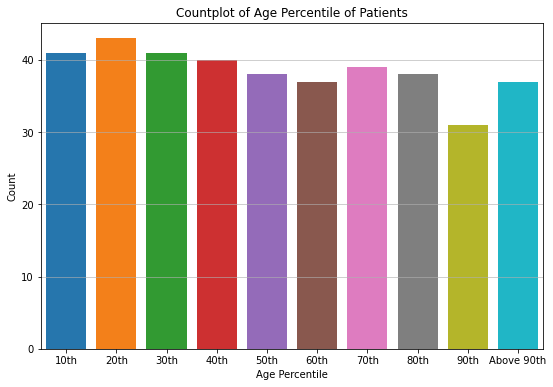

In [17]:
df_copy = df_by_id.sort_values(['AGE_PERCENTIL'])
age_percentiles = df_copy.AGE_PERCENTIL
plt.figure(figsize=(9,6))
sns.countplot(age_percentiles, saturation=0.9)
plt.title('Countplot of Age Percentile of Patients')
plt.xlabel('Age Percentile')
plt.ylabel('Count')
plt.grid(axis='y', alpha=0.75);

 <div dir="rtl" align= "justify">
<font face="Vazir" size=3>
تعداد بیماران بر اساس بازه سنی‌شان در نمودار بالا رسم شده‌است. مشاهده می‌شود که توزیع بیماران بر اساس سن، یکنواخت می‌باشد و به ازای هر بازه سنی، تعداد حدودا یکسانی بیمار در بیمارستان بستری شده‌اند.
</font>
</div>

<hr>

<div dir="rtl" align= "justify">
<font face="Vazir" size=3>
در این قسمت می‌خواهیم ستون tags را که شامل بیماری‌های زمینه ای فرد می‌باشد را انتخاب کرده و بیماری‌های هر فرد را تک به تک مشخص کرده و نمودارهایی بر اساس این بیماری‌های زمینه و ستون‌های دیگر، رسم کنیم. <br>
مشخص است که به ازای هر فرد بیمار، بیماری‌های زمینه ای وی در ستون tags قرار دارد و این بیماری‌ها با ',' از هم جدا شده اند. پس ابتدا سعی می‌کنیم که هر بیماری فرد را جدا کرده و پس از آن بر اساس هر بیماری، نمودارهایی رسم کنیم.</font>
</div>

In [18]:
df_copy = df_by_id.copy()
df_copy['tags_category'] = df_copy['tags'].str.split(', ') 

tag_counter = dict()
for index, row in df_copy.iterrows():
    for tag in row['tags_category']:
        tag_counter[tag] = tag_counter.get(tag, 0) + 1
print(tag_counter)

{'Motor Neurone Disease': 47, 'Smoker': 15, 'no-info': 293, 'asthma': 34, 'Kidney disease': 7, 'Lung cancer': 39, 'heart disease': 9}


In [19]:
def random_color_generator(k):                                       # just for fun :)
    return random.choices(list(mcolors.CSS4_COLORS.values()),k = 8)

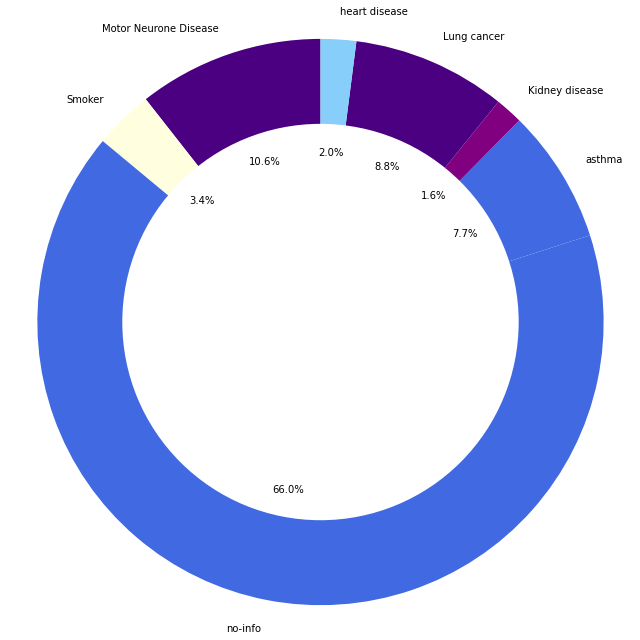

In [20]:
labels = tag_counter.keys()
sizes = list(tag_counter.values())
colors = random_color_generator(len(tag_counter))
 
fig1, ax1 = plt.subplots(figsize=(9,9))
ax1.pie(sizes, colors = colors, labels=labels, autopct='%1.1f%%', startangle=90)
centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
ax1.axis('equal')  
plt.tight_layout()
plt.show()

 <div dir="rtl" align= "justify">
<font face="Vazir" size=3>
با توجه به این که اکثر داده‌های دیتافریم دارای tag با مقدار no-info و یا NaN می‌باشند، پس بهتر است این مقادیر را از نمودار حذف کنیم.
</font>
</div>

In [21]:
tag_counter.pop('no-info')

293

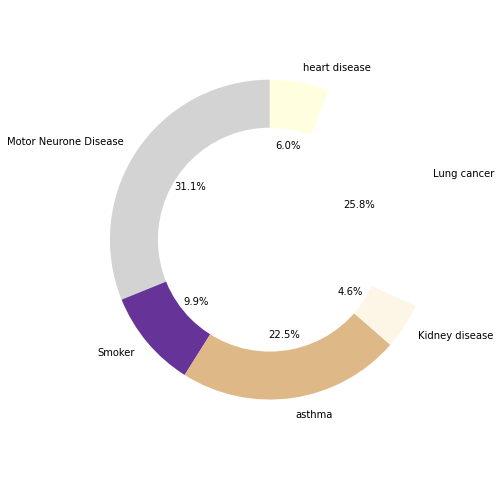

In [22]:
labels = tag_counter.keys()
sizes = list(tag_counter.values())
colors = random_color_generator(len(tag_counter))
 
fig1, ax1 = plt.subplots(figsize=(7,7))
ax1.pie(sizes, colors = colors, labels=labels, autopct='%1.1f%%', startangle=90)
centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
ax1.axis('equal')  
plt.tight_layout()
plt.show()

 <div dir="rtl" align= "justify">
<font face="Vazir" size=3>
درصد افراد براساس بیماری‌های زمینه ای که دارند، در نمودار بالا مشخص می‌باشد.
</font>
</div>

<hr>

### Visualization Based on Time Windows

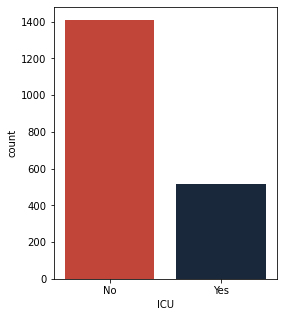

In [23]:
# ICU Countplot

plt.figure(figsize=(4,5))
sns.countplot(df['ICU'].map({1:'Yes', 0:'No'}), palette=['#D93223', '#142740']);

 <div dir="rtl" align= "justify">
<font face="Vazir" size=3>
در نمودار بالا، تعداد دفعات نیاز فرد بیمار به بخش ICU قابل مشاهده می‌باشد. همانگونه مشخص است، در 33 درصد مواقع، فرد بیمار نیازمند بستری شدن در بخش ICU می‌باشد. 
</font>
</div>

<hr>

In [24]:
def bar_plot(df_copy, title='', xlabel='', ylabel=''):
    labels = df_copy.index
    male_counts = list(df_copy['count'][0])
    female_counts = list(df_copy['count'][1])

    x = np.arange(len(labels))
    width = 0.4
    fig, ax = plt.subplots(figsize=(9,6))
    rects1 = ax.bar(x - width/2, male_counts, width, label='No', color='#D93223')
    rects2 = ax.bar(x + width/2, female_counts, width, label='Yes', color='#142740')

    ax.set_title(title)
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    ax.set_xticks(x)
    ax.set_xticklabels(labels)
    ax.legend();

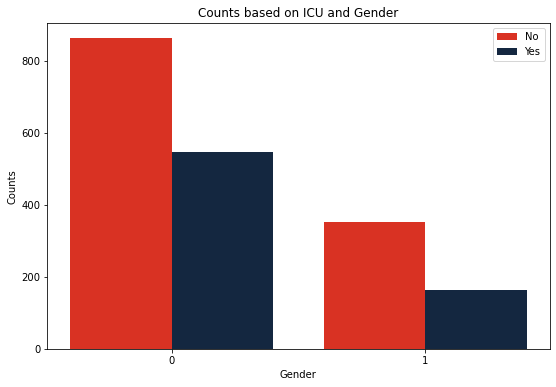

In [25]:
df_copy = df.copy()
df_copy = pd.DataFrame(df_copy.groupby(['GENDER', 'ICU']).count())['tags'].reset_index().rename(columns={'tags':'count'})
df_copy = pd.pivot_table(df_copy, values = ['count'], index=['ICU'], columns=['GENDER'], aggfunc=np.sum)
bar_plot(df_copy, 'Counts based on ICU and Gender', 'Gender', 'Counts')

<div dir="rtl" align= "justify">
<font face="Vazir" size=3>
در نمودار بالا، در محور Gender، 0 معادل مذکر و 1 معادل مونث می‌باشد. در این نمودار مشاهده می‌شود که به صورت حدودی تعداد بیماران مذکر بیشتر از بیماران مونث می‌باشد. همچنین درصد نیاز بیماران مذکر به بستری شدن در ICU نسبت به بیماران مونث، کمی بیشتر است.
</font>
</div>

<hr>

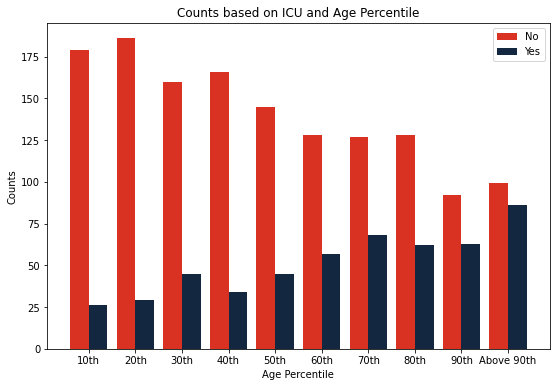

In [26]:
df_copy = df.copy()
df_copy = pd.DataFrame(df_copy.groupby(['ICU', 'AGE_PERCENTIL']).count())['tags'].reset_index().rename(columns={'tags':'count'})
df_copy = pd.pivot_table(df_copy, values = ['count'], index=['AGE_PERCENTIL'], columns=['ICU'], aggfunc=np.sum)
bar_plot(df_copy, 'Counts based on ICU and Age Percentile', 'Age Percentile', 'Counts')

<div dir="rtl" align= "justify">
<font face="Vazir" size=3>
نمودار بالا، تعداد بیمارانی که نیاز به بستری شدن در ICU دارند با بیمارانی که این نیاز را ندارند، بر اساس سن را نشان می‌دهد. مشاهده می‌شود که با بالاتر رفتن سن بیماران، نیاز آن‌ها به بستری شدن نیز افزایش پیدا می‌کند. به طوریکه حدود 50 درصد بیماران با سن بالاتر از 90 سال، نیازمند بستری شدن در بازه زمانی خاصی بعد از بستری شدن، می‌باشند. در حالیکه برای افراد در بازه زیر 20 سال، این مقدار حدود 15 درصد می‌باشد. 
</font>
</div>

<hr>

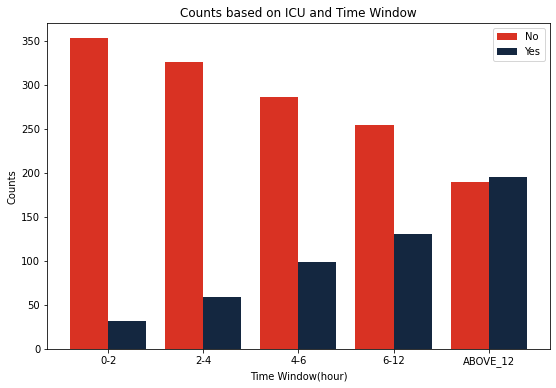

In [27]:
df_copy = df.copy()
df_copy = pd.DataFrame(df_copy.groupby(['ICU', 'WINDOW']).count())['tags'].reset_index().rename(columns={'tags':'count'})
df_copy = pd.pivot_table(df_copy, values = ['count'], index=['WINDOW'], columns=['ICU'], aggfunc=np.sum)
bar_plot(df_copy, 'Counts based on ICU and Time Window', 'Time Window(hour)', 'Counts')

 <div dir="rtl" align= "justify">
<font face="Vazir" size=3>
نمودار بالا، میزان انتقال فرد بیمار به ICU با توجه به Time Window یا بازه زمانی سپری شده پس از بستری شدن فرد را نشان می‌دهد. این نمودار نشان می‌دهد که معمولا که با سپری شدن زمان بستری فرد در بیمارستان، احتمال منتقل شدن فرد به ICU نیز افزایش می‌یابد.
</font>
</div>

<hr>

In [28]:
df_copy = df.copy()
df_by_id_with_ICU = df_by_id.copy()
df_by_id_with_ICU['ICU'] = (df_copy.groupby('PATIENT_VISIT_IDENTIFIER').sum()['ICU'] > 1)
df_by_id_with_ICU['ICU'] = df_by_id_with_ICU['ICU'].astype(int)
df_by_id_with_ICU = df_by_id_with_ICU[df_by_id_with_ICU['tags'] != 'no-info']

In [29]:
count_1 = df_by_id_with_ICU.groupby('tags').sum()['ICU']
count_2 = df_by_id_with_ICU.groupby('tags').count()['ICU']
index = count_1.index
df_copy = pd.DataFrame(index=index, data={'need ICU':count_1, 'all':count_2})

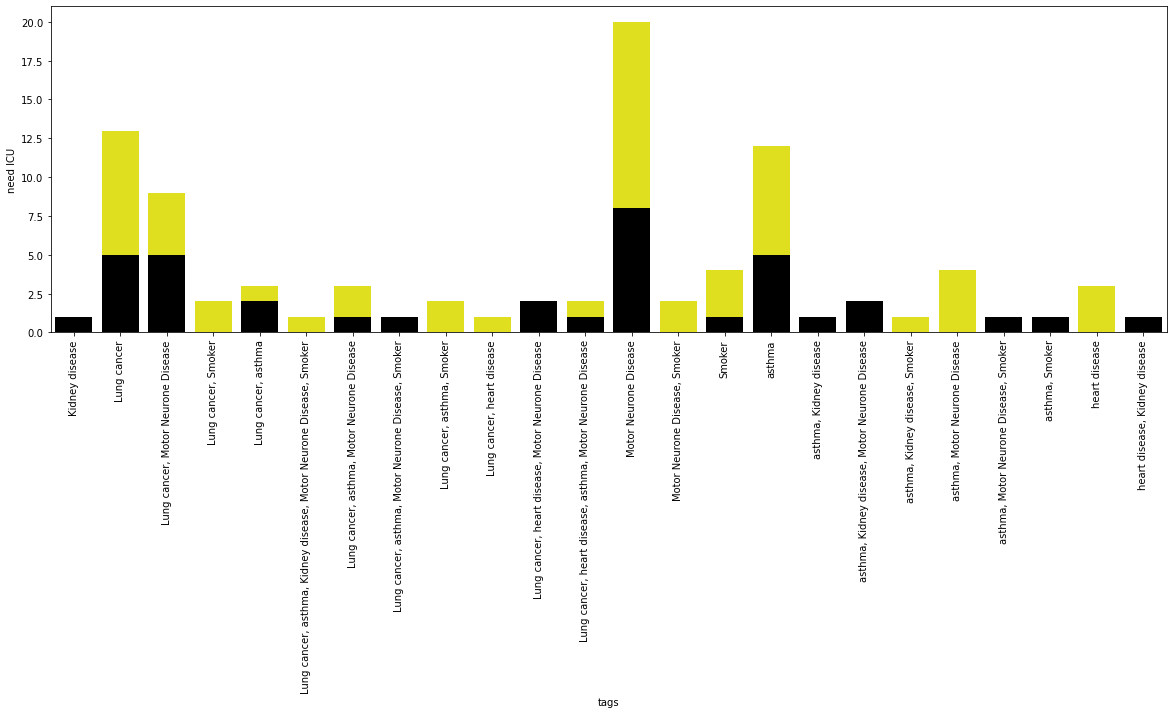

In [30]:
plt.figure(figsize=(20,6))
ax_2 = sns.barplot(x=df_copy.index, y=df_copy['all'], color='yellow')
ax_1 = sns.barplot(x=df_copy.index, y=df_copy['need ICU'], color='black')
plt.xticks(rotation=90);

 <div dir="rtl" align= "justify">
<font face="Vazir" size=3>
در نمودار بالا، میزان نیاز هر بیمار به ICU به ازای هر زیرمجموعه از بیماری‌ها قابل مشاهده است. البته با توجه به این که تعداد زیرمجموعه بیماری زیاد است، بهتر است که به ازای هر نوع بیماری، این بررسی انجام گیرد.
</font>
</div>

<hr>

In [31]:
df_copy = df_by_id_with_ICU.copy()
df_copy['tags'] = df_copy['tags'].str.split(', ') 

tag_counter = dict()
for index, row in df_copy.iterrows():
    for tag in row['tags']:
        tag_counter[tag] = tag_counter.get(tag, 0) + 1

for tag in tag_counter.keys():
    df_copy[tag] = 0

for i, row in df_copy.iterrows():
    for tag in row['tags']:
        df_copy.loc[i, tag] = 1

df_copy = df_copy.groupby('ICU').sum()
df_copy = df_copy.drop(columns=['PATIENT_VISIT_IDENTIFIER', 'GENDER'])
df_copy

,Motor Neurone Disease,Smoker,asthma,Kidney disease,Lung cancer,heart disease
ICU,,,,,,
0,26,11,19,2,22,5
1,21,4,15,5,17,4


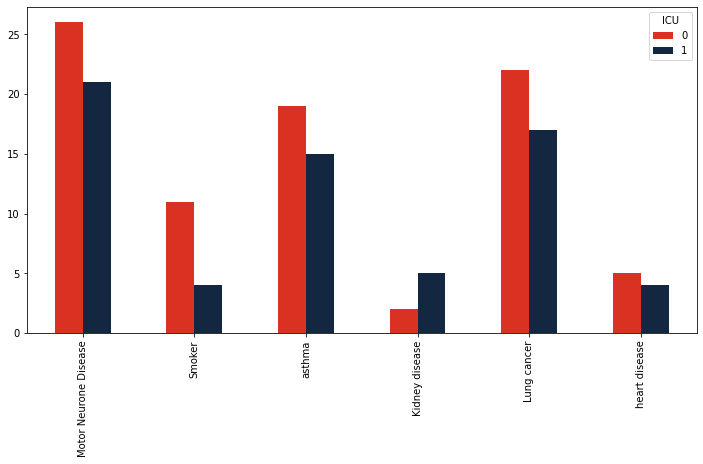

In [32]:
df_copy.T.plot(kind="bar", color=['#D93223', '#142740'], figsize=(12,6))
plt.show()

In [33]:
df_copy = df_copy.T
df_copy['all'] = df_copy[0] + df_copy[1]
df_copy = df_copy.drop(columns=[0])

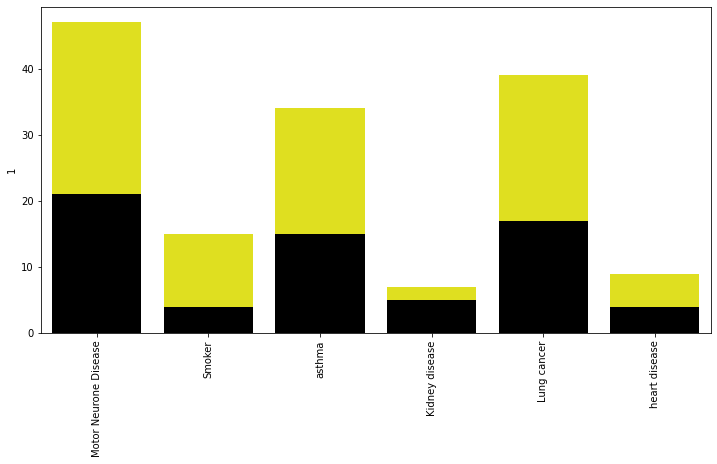

In [34]:
plt.figure(figsize=(12,6))
ax_2 = sns.barplot(x=df_copy.index, y=df_copy['all'], color='yellow')
ax_1 = sns.barplot(x=df_copy.index, y=df_copy[1], color='black')
plt.xticks(rotation=90);

<div dir="rtl" align= "justify">
<font face="Vazir" size=3>
در نمودار بالا، میزان نیاز به انتقال به بخش ICU به ازای هر نوع بیماری به صورت مجزا مشخص شده است. البته با توجه به کم بودن تعداد بیماران و همچنین عدم بررسی تجمیع انواع بیماری در هر فرد بیمار، نمی‌توان به طور دقیق مشخص کرد که چه نوع بیمازی زمینه‌ای می‌تواند منجر به انتقال به بخش ICU گردد ولی می‌توان شهود نسبی از این نمودار پیدا کرد که افراد مبتلا به Kidney disease با احتمال بیشتری نسبت به افراد Smoker ممکن است که نیاز به بخش ICU داشته باشند.
</font>
</div>

# Feature Engineering

In [35]:
# modeling_df

In [36]:
df_copy = df_compact.copy()
df_copy['tags'] = df_copy['tags'].str.split(', ') 

tag_counter = dict()
for index, row in df_copy.iterrows():
    for tag in row['tags']:
        tag_counter[tag] = tag_counter.get(tag, 0) + 1

for tag in tag_counter.keys():
    df_copy[tag] = 0

for i, row in df_copy.iterrows():
    for tag in row['tags']:
        df_copy.loc[i, tag] = 1


In [37]:
modeling_df = df_copy.copy()
modeling_df = modeling_df.drop(columns=['tags'])

In [38]:
def one_hot_encoder(df, column):
    df_copy = df.copy()
    df_copy[column] = df_copy[column].astype('category')
    one_hot_encoder = OneHotEncoder(handle_unknown='ignore')
    tags_column_unique = np.array(df_copy[column]).reshape(-1, 1)
    one_hot_df = pd.DataFrame(one_hot_encoder.fit_transform(tags_column_unique).toarray())
    one_hot_df.columns = [column + '_' + str(col) for col in one_hot_df.columns]
    df_copy = df_copy.join(one_hot_df)
    df_copy.drop(columns=[column], inplace=True)
    return df_copy

def label_encode(df, column):
    df_copy = df.copy()
    df_copy[column] = df_copy[column].astype('category')
    label_encoder = LabelEncoder()
    df_copy[column] = label_encoder.fit_transform(df_copy[column])
    return df_copy

In [39]:
# df_copy = one_hot_encoder(df_compact, 'tags')
# df_copy = one_hot_encoder(df_copy, 'WINDOW')
# df_copy = one_hot_encoder(df_copy, 'AGE_PERCENTIL')

In [40]:
try:
    modeling_df = label_encode(modeling_df, 'WINDOW')
    modeling_df = label_encode(modeling_df, 'AGE_PERCENTIL')
except:
    pass

<div dir="rtl" align= "justify">
<font face="Vazir" size=3>
اکنون تمام ستون‌های modeling_df از جنس عدد می‌باشند و با label encoding، مقادیر categorical به ستون‌های عدد تبدیل شده اند.
</font>
</div>

<hr>

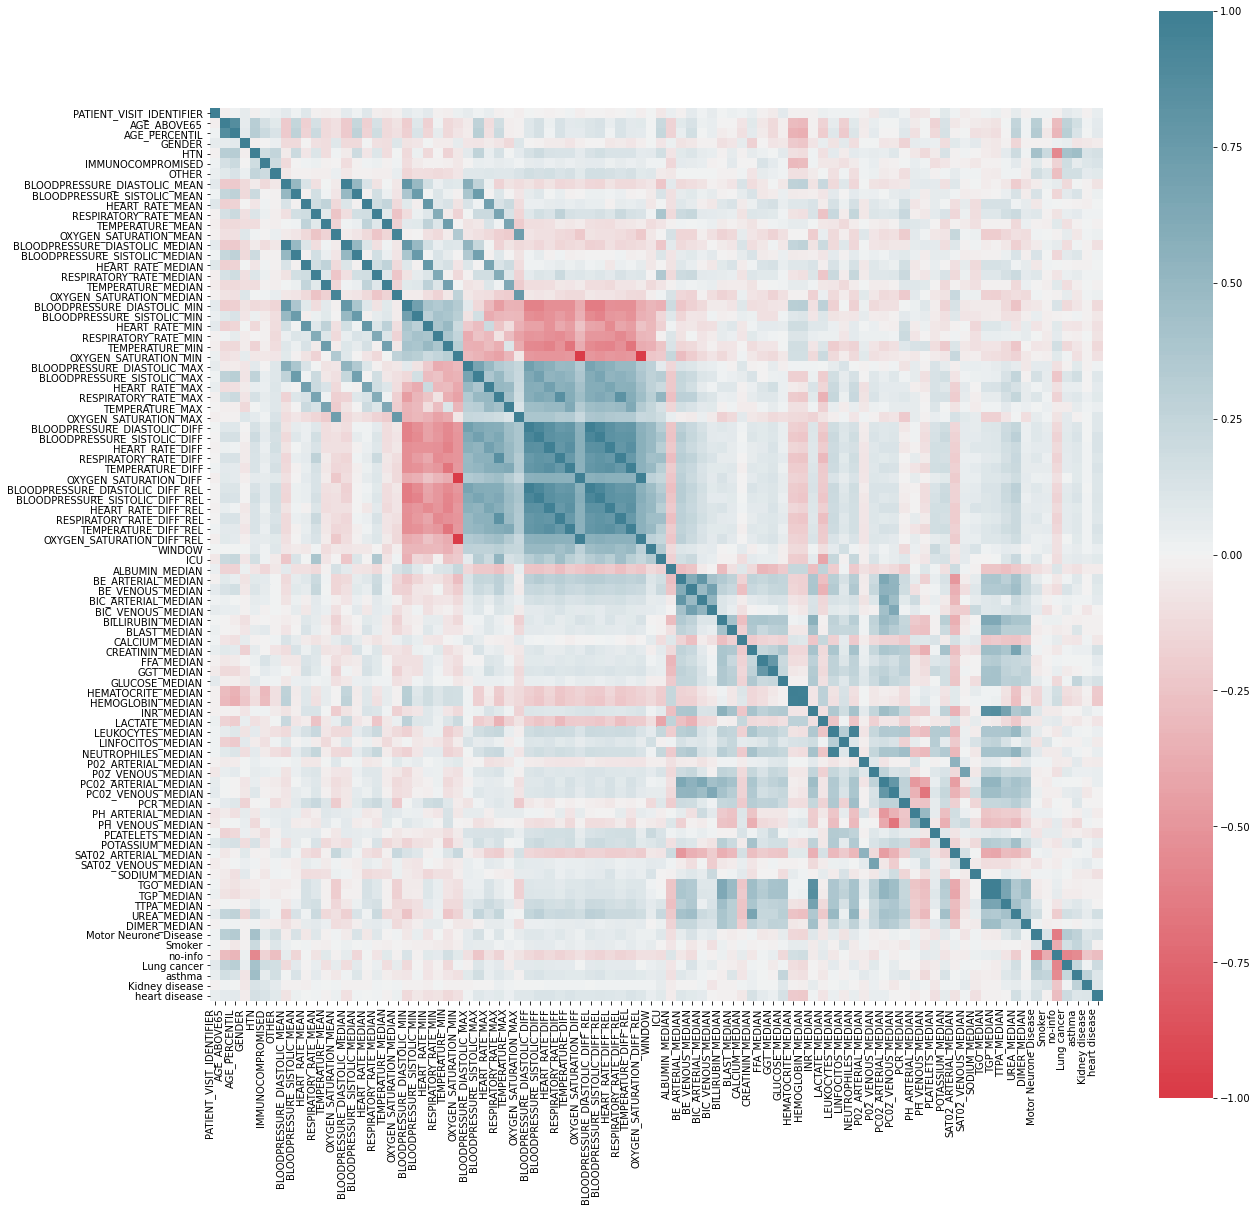

In [41]:
corr = modeling_df.corr()

plt.figure(figsize=(20,20))
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(10, 220, n=200),
    square=True,
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=90,
    horizontalalignment='right'
);

In [42]:
related_columns = set(corr[abs(corr['ICU']) > 0.15].index)

In [43]:
len(related_columns)

38

<div dir="rtl" align= "justify">
<font face="Vazir" size=3>
با توجه به correlation heat map ستون‌های انتخاب شده، مشاهده می‌شود که تعدادی از ستون‌های دیتاست، با یکدیگر رابطه همبستگی زیادی دراند. بنابراین بهتراست برخی از این ستون‌ها از بین ستون‌های انتخاب شده حذف شوند تا عملکرد الگوریتم‌ها در مراحل بعدی، بهتر شود.
</font>
</div>

In [44]:
duplicated_related_columns = set()
for column_1 in related_columns:
    for column_2 in related_columns:
        if column_1 != column_2:
            if abs(corr[column_1][column_2]) > 0.98:
                duplicated_related_columns.add(column_2)
related_columns = related_columns - duplicated_related_columns

In [45]:
len(related_columns)

23

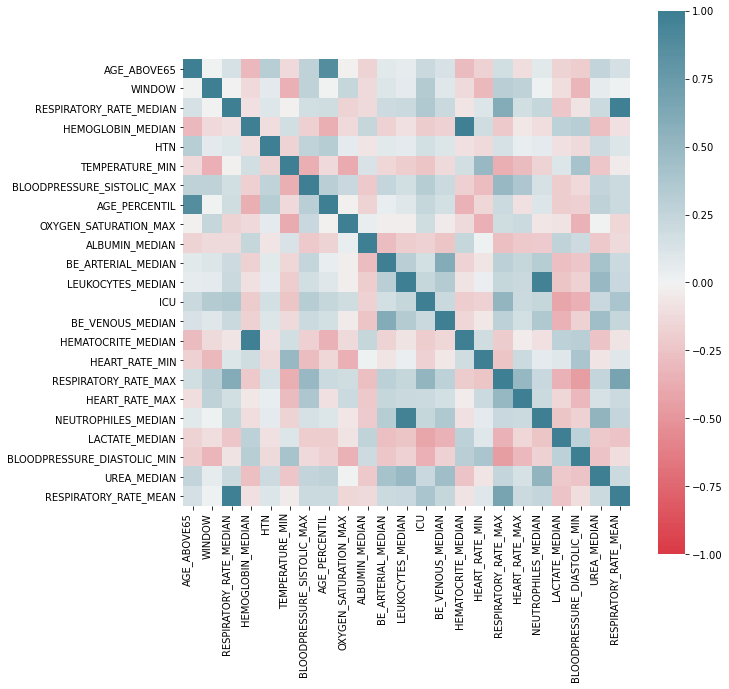

In [46]:
corr = modeling_df[related_columns].corr()

plt.figure(figsize=(10,10))
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(10, 220, n=200),
    square=True,
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=90,
    horizontalalignment='right'
);

In [47]:
modeling_df = modeling_df[related_columns]

# Modeling

<div dir="rtl" align= "justify">
<font face="Vazir" size=3>
در این بخش می‌خواهیم در دو بخش و با استفاده از امکانات کتابخانه sklearn به بررسی و سنجش عملکرد مدل‌های یادگیری ماشین بر روی دیتاستی که داریم، بپردازیم. در بخش اول به صورت دستی و با پارامترهای مشخصی و با استفاده از Grid Search به بررسی مدل‌های مختلف می‌پردازیم. همچنین بهترین accuracy  و f1-score بدست آمده را بررسی خواهیم کرد و سپس با استفاده از Cross Validation و معیار f1-macro، به بررسی عملکرد کلی مدل روی کل دیتاست می‌پردازیم. در انتهای بخش اول هم جدول‌هایی را بر اساس نتایج مدل‌ها بر روی داده‌های train  و test و validation داریم که برای بررسی بهتر مدل به کار می‌روند. <br>
در بخش دوم، از ابزارهای pipline استفاده می‌کنیم تا داده خامی را که داشتیم، پردازش کرده و با استفاده از امکانات pipeline و به صورت اتوماتیک، مدل‌ها را آموزش می‌دهیم و آن‌ها رو مورد بررسی قرار می‌دهیم. همچنین نتایج در این بخش نیز نتایج هر مدل با استفاده از cross validation محاسبه شده است و جداولی مانند قسمت قبل نیز در این بخش، وجود دارند.
</font>
</div>

## Data Spliting

In [227]:
X = modeling_df.drop(columns=['ICU'])
Y = modeling_df['ICU']

## Normilizing data

In [228]:
X = (X - X.mean())/(X.std()) 

## Data Splitting

<div dir="rtl" align= "justify">
<font face="Vazir" size=3>
داده‌ها را به سه قسمت train, validation, test با نسبت‌های 0.7 و 0.15 و 0.15 تقسیم می‌کنیم.
</font>
</div>

In [229]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.15, random_state=22)
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.175, random_state=22)

## Learning

### Naive Bayes

In [110]:
param_grid = dict(
    var_smoothing = [0.01, 0.001, 1e-4, 1e-5, 1e-6, 5e-6, 1e-7, 5e-7, 1e-8, 5e-8, 1e-9, 1e-10]
)
gnb = GaussianNB()
clf_gnb = GridSearchCV(gnb, param_grid)

clf_gnb.fit(x_train, y_train)

GridSearchCV(estimator=GaussianNB(),
             param_grid={'var_smoothing': [0.01, 0.001, 0.0001, 1e-05, 1e-06,
                                           5e-06, 1e-07, 5e-07, 1e-08, 5e-08,
                                           1e-09, 1e-10]})

In [236]:
print(clf_gnb.score(x_train, y_train))
print(clf_gnb.score(x_val, y_val))
print()
print(f1_score(clf_gnb.predict(x_train), y_train))
print(f1_score(clf_gnb.predict(x_val), y_val))
print()
scores_nb = cross_val_score(clf_gnb, X, Y, cv=5, scoring='f1_macro')
print("%0.2f f1_macro with a standard deviation of %0.2f" % (scores_nb.mean(), scores_nb.std()))

0.8109710896960711
0.8222996515679443

0.629898403483309
0.6277372262773723

0.74 f1_macro with a standard deviation of 0.02


### Logistic Regression

In [112]:
param_grid = dict(
    C = [1.0, 0.5, 0.25, 2.0],
    tol = [0.0001, 0.001, 0.01, 0.1, 1.0]
)
lr = LogisticRegression(max_iter = 100)
clf_lr = GridSearchCV(lr, param_grid)

clf_lr.fit(x_train, y_train)

GridSearchCV(estimator=LogisticRegression(),
             param_grid={'C': [1.0, 0.5, 0.25, 2.0],
                         'tol': [0.0001, 0.001, 0.01, 0.1, 1.0]})

In [235]:
print(clf_lr.score(x_train, y_train))
print(clf_lr.score(x_val, y_val))
print()
print(f1_score(clf_lr.predict(x_train), y_train))
print(f1_score(clf_lr.predict(x_val), y_val))
print()
scores_lr = cross_val_score(clf_lr, X, Y, cv=5, scoring='f1_macro')
print("%0.2f f1_macro with a standard deviation of %0.2f" % (scores_lr.mean(), scores_lr.std()))

0.8480355819125278
0.8641114982578397

0.6962962962962963
0.7346938775510204

0.78 f1_macro with a standard deviation of 0.02


### kNN

In [114]:
param_grid = dict(
    n_neighbors = [1, 3, 10, 16, 21, 33],
    weights = ['uniform', 'distance', 'minkowski'],
    leaf_size = [15, 30, 60]
)
knn = KNeighborsClassifier()
clf_knn = GridSearchCV(knn, param_grid)

clf_knn.fit(x_train, y_train)

GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'leaf_size': [15, 30, 60],
                         'n_neighbors': [1, 3, 10, 16, 21, 33],
                         'weights': ['uniform', 'distance', 'minkowski']})

In [234]:
print(clf_knn.score(x_train, y_train))
print(clf_knn.score(x_val, y_val))
print()
print(f1_score(clf_knn.predict(x_train), y_train))
print(f1_score(clf_knn.predict(x_val), y_val))
print()
scores_knn = cross_val_score(clf_knn, X, Y, cv=5, scoring='f1_macro')
print("%0.2f f1_macro with a standard deviation of %0.2f" % (scores_knn.mean(), scores_knn.std()))

1.0
0.8641114982578397

1.0
0.6880000000000001

0.76 f1_macro with a standard deviation of 0.02


### SVM

In [116]:
param_grid = dict(
    C = [0.1, 0.25, 0.5, 1.0, 2.0, 5.0],
    gamma = ['scale', 'auto']
)
svm = SVC()
clf_svm = GridSearchCV(svm, param_grid)

clf_svm.fit(x_train, y_train)

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 0.25, 0.5, 1.0, 2.0, 5.0],
                         'gamma': ['scale', 'auto']})

In [237]:
print(clf_svm.score(x_train, y_train))
print(clf_svm.score(x_val, y_val))
print()
print(f1_score(clf_svm.predict(x_train), y_train))
print(f1_score(clf_svm.predict(x_val), y_val))
print()
scores_svm = cross_val_score(clf_svm, X, Y, cv=5, scoring='f1_macro')
print("%0.2f f1_macro with a standard deviation of %0.2f" % (scores_svm.mean(), scores_svm.std()))

0.9562638991845812
0.8989547038327527

0.915593705293276
0.7943262411347518

0.78 f1_macro with a standard deviation of 0.02


### Decsision Tree

In [118]:
param_grid = dict(
    criterion = ['gini', 'entropy'],
    splitter = ['best', 'random']
)
dt = DecisionTreeClassifier()
clf_dt = GridSearchCV(dt, param_grid)

clf_dt.fit(x_train, y_train)

GridSearchCV(estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'splitter': ['best', 'random']})

In [238]:
print(clf_dt.score(x_train, y_train))
print(clf_dt.score(x_val, y_val))
print()
print(f1_score(clf_dt.predict(x_train), y_train))
print(f1_score(clf_dt.predict(x_val), y_val))
print()
scores_dt = cross_val_score(clf_dt, X, Y, cv=5, scoring='f1_macro')
print("%0.2f f1_macro with a standard deviation of %0.2f" % (scores_dt.mean(), scores_dt.std()))

1.0
0.8362369337979094

1.0
0.6802721088435374

0.73 f1_macro with a standard deviation of 0.04


### Ada-Boost

In [120]:
param_grid = dict(
    learning_rate = [0.001, 0.01, 0.1, 0.5, 1, 2.5],
    n_estimators = [10, 25, 50, 100]
)
ada = AdaBoostClassifier()
clf_ada = GridSearchCV(ada, param_grid)

clf_ada.fit(x_train, y_train)

GridSearchCV(estimator=AdaBoostClassifier(),
             param_grid={'learning_rate': [0.001, 0.01, 0.1, 0.5, 1, 2.5],
                         'n_estimators': [10, 25, 50, 100]})

In [239]:
print(clf_ada.score(x_train, y_train))
print(clf_ada.score(x_val, y_val))
print()
print(f1_score(clf_ada.predict(x_train), y_train))
print(f1_score(clf_ada.predict(x_val), y_val))
print()
scores_ada = cross_val_score(clf_ada, X, Y, cv=5, scoring='f1_macro')
print("%0.2f f1_macro with a standard deviation of %0.2f" % (scores_ada.mean(), scores_ada.std()))

0.8910303928836175
0.8432055749128919

0.7841409691629956
0.697986577181208

0.79 f1_macro with a standard deviation of 0.03


### Random Forest

In [122]:
param_grid = dict(
    criterion = ['gini', 'entropy']
)
rf = RandomForestClassifier()
clf_rf = GridSearchCV(rf, param_grid)

clf_rf.fit(x_train, y_train)

GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy']})

In [240]:
print(clf_rf.score(x_train, y_train))
print(clf_rf.score(x_val, y_val))
print()
print(f1_score(clf_rf.predict(x_train), y_train))
print(f1_score(clf_rf.predict(x_val), y_val))
print()
scores_rf = cross_val_score(clf_rf, X, Y, cv=5, scoring='f1_macro')
print("%0.2f f1_macro with a standard deviation of %0.2f" % (scores_rf.mean(), scores_rf.std()))

1.0
0.9059233449477352

1.0
0.8029197080291972

0.80 f1_macro with a standard deviation of 0.02


### Neural Network

In [124]:
param_grid = dict(
    activation = ['tanh', 'relu'],
    solver= ['adam']
)
nn = MLPClassifier()
clf_nn = GridSearchCV(nn, param_grid)

clf_nn.fit(x_train, y_train)

GridSearchCV(estimator=MLPClassifier(),
             param_grid={'activation': ['tanh', 'relu'], 'solver': ['adam']})

In [241]:
print(clf_nn.score(x_train, y_train))
print(clf_nn.score(x_val, y_val))
print()
print(f1_score(clf_nn.predict(x_train), y_train))
print(f1_score(clf_nn.predict(x_val), y_val))
print()
scores_nn = cross_val_score(clf_nn, X, Y, cv=5, scoring='f1_macro')
print("%0.2f f1_macro with a standard deviation of %0.2f" % (scores_nn.mean(), scores_nn.std()))

0.9532987398072647
0.89198606271777

0.9121338912133891
0.7999999999999999

0.79 f1_macro with a standard deviation of 0.04


## Evaluation

In [126]:
def accuracy(y, y_hat) -> float:
    return accuracy_score(y, y_hat)

def f1(y, y_hat, alpha: float = 0.5, beta: float = 1.):
    return f1_score(y, y_hat)

def precision(y, y_hat) -> float:
    return precision_score(y, y_hat)


def recall(y, y_hat) -> float:
    return recall_score(y, y_hat)

def f1_negative(y, y_hat, alpha: float = 0.5, beta: float = 1.):
    y = 1 - y
    y_hat = 1 - y_hat
    return f1_score(y, y_hat)

def precision_negative(y, y_hat) -> float:
    y = 1 - y
    y_hat = 1 - y_hat
    return precision_score(y, y_hat)

def recall_negative(y, y_hat) -> float:
    y = 1 - y
    y_hat = 1 - y_hat
    return recall_score(y, y_hat)

def roc_auc(y, y_hat) -> float:
    return roc_auc_score(y, y_hat)

def aps(y, y_hat) -> float:
    return average_precision_score(y, y_ha)

evaluation_functions = dict(accuracy=accuracy, f1=f1, precision=precision, recall=recall,f1_negative=f1_negative, precision_negative=precision_negative, recall_negative=recall_negative, roc_auc=roc_auc, average_precision_score=average_precision_score)

def evaluate(y, y_hat):
    return {name: func(y, y_hat) for name, func in evaluation_functions.items()}


### Evaluation on Training Data

In [127]:
y_train_hat_nb = clf_gnb.predict(x_train).astype(int)
nb_train_evaluation = evaluate(y_train, y_train_hat_nb)

y_train_hat_lr = clf_lr.predict(x_train).astype(int)
lr_train_evaluation = evaluate(y_train, y_train_hat_lr)

y_train_hat_knn = clf_knn.predict(x_train).astype(int)
knn_train_evaluation = evaluate(y_train, y_train_hat_knn)

y_train_hat_svm = clf_svm.predict(x_train).astype(int)
svm_train_evaluation = evaluate(y_train, y_train_hat_svm)

y_train_hat_dt = clf_dt.predict(x_train).astype(int)
dt_train_evaluation = evaluate(y_train, y_train_hat_dt)

y_train_hat_ada = clf_ada.predict(x_train).astype(int)
ada_train_evaluation = evaluate(y_train, y_train_hat_ada)

y_train_hat_rf = clf_rf.predict(x_train).astype(int)
rf_train_evaluation = evaluate(y_train, y_train_hat_rf)

y_train_hat_nn = clf_nn.predict(x_train).astype(int)
nn_train_evaluation = evaluate(y_train, y_train_hat_nn)

In [128]:
training_evaluation_df = pd.DataFrame(data={
    'NB':list(nb_train_evaluation.values()),
    'LR':list(lr_train_evaluation.values()),
    'kNN':list(knn_train_evaluation.values()),
    'SVM':list(svm_train_evaluation.values()),
    'DT':list(dt_train_evaluation.values()),
    'ADA':list(ada_train_evaluation.values()),
    'RF':list(rf_train_evaluation.values()),
    'NN':list(nn_train_evaluation.values())
}, index=nb_train_evaluation.keys())
training_evaluation_df

,NB,LR,kNN,SVM,DT,ADA,RF,NN
accuracy,0.810971,0.848036,1.0,0.956264,1.0,0.891030,1.0,0.953299
f1,0.629898,0.696296,1.0,0.915594,1.0,0.784141,1.0,0.912134
precision,0.691083,0.783333,1.0,0.987654,1.0,0.872549,1.0,0.956140
recall,0.578667,0.626667,1.0,0.853333,1.0,0.712000,1.0,0.872000
f1_negative,0.873071,0.898665,1.0,0.970485,1.0,0.927119,1.0,0.968198
precision_negative,0.847343,0.866540,1.0,0.946341,1.0,0.896453,1.0,0.952334
recall_negative,0.900411,0.933265,1.0,0.995893,1.0,0.959959,1.0,0.984600
roc_auc,0.739539,0.779966,1.0,0.924613,1.0,0.835979,1.0,0.928300
average_precision_score,0.517030,0.594669,1.0,0.883569,1.0,0.701314,1.0,0.869336


### Evaluation on Validation Data

In [129]:
y_val_hat_nb = clf_gnb.predict(x_val).astype(int)
nb_val_evaluation = evaluate(y_val, y_val_hat_nb)

y_val_hat_lr = clf_lr.predict(x_val).astype(int)
lr_val_evaluation = evaluate(y_val, y_val_hat_lr)

y_val_hat_knn = clf_knn.predict(x_val).astype(int)
knn_val_evaluation = evaluate(y_val, y_val_hat_knn)

y_val_hat_svm = clf_svm.predict(x_val).astype(int)
svm_val_evaluation = evaluate(y_val, y_val_hat_svm)

y_val_hat_dt = clf_dt.predict(x_val).astype(int)
dt_val_evaluation = evaluate(y_val, y_val_hat_dt)

y_val_hat_ada = clf_ada.predict(x_val).astype(int)
ada_val_evaluation = evaluate(y_val, y_val_hat_ada)

y_val_hat_rf = clf_rf.predict(x_val).astype(int)
rf_val_evaluation = evaluate(y_val, y_val_hat_rf)

y_val_hat_nn = clf_nn.predict(x_val).astype(int)
nn_val_evaluation = evaluate(y_val, y_val_hat_nn)

In [130]:
validation_evaluation_df = pd.DataFrame(data={
    'NB':list(nb_val_evaluation.values()),
    'LR':list(lr_val_evaluation.values()),
    'kNN':list(knn_val_evaluation.values()),
    'SVM':list(svm_val_evaluation.values()),
    'DT':list(dt_val_evaluation.values()),
    'ADA':list(ada_val_evaluation.values()),
    'RF':list(rf_val_evaluation.values()),
    'NN':list(nn_val_evaluation.values())
}, index=nb_val_evaluation.keys())
validation_evaluation_df

,NB,LR,kNN,SVM,DT,ADA,RF,NN
accuracy,0.822300,0.864111,0.864111,0.898955,0.836237,0.843206,0.905923,0.891986
f1,0.627737,0.734694,0.688000,0.794326,0.680272,0.697987,0.802920,0.800000
precision,0.741379,0.794118,0.934783,0.903226,0.735294,0.742857,0.948276,0.815789
recall,0.544304,0.683544,0.544304,0.708861,0.632911,0.658228,0.696203,0.784810
f1_negative,0.883295,0.908665,0.913140,0.933025,0.889930,0.894118,0.938215,0.926014
precision_negative,0.842795,0.885845,0.850622,0.897778,0.867580,0.875576,0.895197,0.919431
recall_negative,0.927885,0.932692,0.985577,0.971154,0.913462,0.913462,0.985577,0.932692
roc_auc,0.736094,0.808118,0.764940,0.840007,0.773186,0.785845,0.840890,0.858751
average_precision_score,0.528971,0.629923,0.634241,0.720401,0.566421,0.583046,0.743816,0.699473


### Evaluation on Test Data

In [131]:
y_test_hat_nb = clf_gnb.predict(x_test).astype(int)
nb_test_evaluation = evaluate(y_test, y_test_hat_nb)

y_test_hat_lr = clf_lr.predict(x_test).astype(int)
lr_test_evaluation = evaluate(y_test, y_test_hat_lr)

y_test_hat_knn = clf_knn.predict(x_test).astype(int)
knn_test_evaluation = evaluate(y_test, y_test_hat_knn)

y_test_hat_svm = clf_svm.predict(x_test).astype(int)
svm_test_evaluation = evaluate(y_test, y_test_hat_svm)

y_test_hat_dt = clf_dt.predict(x_test).astype(int)
dt_test_evaluation = evaluate(y_test, y_test_hat_dt)

y_test_hat_ada = clf_ada.predict(x_test).astype(int)
ada_test_evaluation = evaluate(y_test, y_test_hat_ada)

y_test_hat_rf = clf_rf.predict(x_test).astype(int)
rf_test_evaluation = evaluate(y_test, y_test_hat_rf)

y_test_hat_nn = clf_nn.predict(x_test).astype(int)
nn_test_evaluation = evaluate(y_test, y_test_hat_nn)

In [132]:
test_evaluation_df = pd.DataFrame(data={
    'NB':list(nb_test_evaluation.values()),
    'LR':list(lr_test_evaluation.values()),
    'kNN':list(knn_test_evaluation.values()),
    'SVM':list(svm_test_evaluation.values()),
    'DT':list(dt_test_evaluation.values()),
    'ADA':list(ada_test_evaluation.values()),
    'RF':list(rf_test_evaluation.values()),
    'NN':list(nn_test_evaluation.values())
}, index=nb_test_evaluation.keys())
test_evaluation_df

,NB,LR,kNN,SVM,DT,ADA,RF,NN
accuracy,0.823529,0.868512,0.882353,0.892734,0.775087,0.899654,0.906574,0.878893
f1,0.578512,0.660714,0.660000,0.735043,0.525547,0.747826,0.756757,0.705882
precision,0.583333,0.725490,0.846154,0.767857,0.473684,0.796296,0.840000,0.724138
recall,0.573770,0.606557,0.540984,0.704918,0.590164,0.704918,0.688525,0.688525
f1_negative,0.888403,0.918455,0.928870,0.932755,0.852608,0.937365,0.942184,0.923747
precision_negative,0.886463,0.899160,0.888000,0.922747,0.882629,0.923404,0.920502,0.917749
recall_negative,0.890351,0.938596,0.973684,0.942982,0.824561,0.951754,0.964912,0.929825
roc_auc,0.732061,0.772577,0.757334,0.823950,0.707363,0.828336,0.826718,0.809175
average_precision_score,0.424665,0.523096,0.554641,0.603560,0.366057,0.623607,0.644105,0.564331


### Comparing f1-scores

In [134]:
train = training_evaluation_df.loc['f1']
train = train.rename('f1 training')
val = validation_evaluation_df.loc['f1']
val = val.rename('f1 val')
test = test_evaluation_df.loc['f1']
test = test.rename('f1 test')

f1_macro_scores = [scores_nb.mean(), scores_lr.mean(), scores_knn.mean(), scores_svm.mean(), scores_dt.mean(), scores_ada.mean(), scores_rf.mean(), scores_nn.mean()]
f1_macro_scores = pd.Series(dict(zip(['NB', 'LR', 'kNN', 'SVM', 'DT', 'ADA', 'RF', 'NN'], f1_macro_scores)))
f1_macro_scores = f1_macro_scores.rename('f1-macro')

pd.concat((train, val, test, f1_macro_scores), axis=1)

,f1 training,f1 val,f1 test,f1-macro
NB,0.629898,0.627737,0.578512,0.744375
LR,0.696296,0.734694,0.660714,0.781835
kNN,1.000000,0.688000,0.660000,0.759103
SVM,0.915594,0.794326,0.735043,0.778103
DT,1.000000,0.680272,0.525547,0.747217
ADA,0.784141,0.697987,0.747826,0.789750
RF,1.000000,0.802920,0.756757,0.804692
NN,0.912134,0.800000,0.705882,0.789540


<hr>

# More Automatic Learning!

<div dir="rtl" align= "justify">
<font face="Vazir" size=3>
    در این قسمت می‌خواهیم که مدل‌های یادگیری ماشین استفاده شده در قسمت قبل را بر روی داده train ای که توسط ابزارهای موجود در sklearn برای آماده کردن دیتا و tune کردن مدل‌ها فراهم شده است، آموزش داده و سپس تست نماییم. برای این کار از ابزار pipeline و ابزارهای مورد نیاز دیگر استفاده می‌نماییم. منبع اصلی برای پیاده سازی‌های زیر، این 
<a href='https://medium.com/vickdata/a-simple-guide-to-scikit-learn-pipelines-4ac0d974bdcf'>مقاله</a> می‌باشد.
</font>
</div>

## Preprocessing with Pipeline

In [76]:
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())])
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))])

In [77]:
df_copy = df_compact.copy()

X = df_copy.drop(columns=['ICU'])
Y = df_copy['ICU']

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.15, random_state=22)
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.175, random_state=22)

In [78]:
numeric_features = x_train.select_dtypes(include=['int64', 'float64']).columns
categorical_features = x_train.select_dtypes(include=['object']).columns

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

## Learning

### Naive Bayes

In [79]:
p_nb = Pipeline(steps=[('preprocessor', preprocessor),
                      ('classifier', GaussianNB())])
p_nb.fit(x_train, y_train)

y_t_train = p_nb.predict(x_train)
y_t_val = p_nb.predict(x_val)
y_t_test = p_nb.predict(x_test)

p_nb_evaluation_train = evaluate(y_train, y_t_train)
p_nb_evaluation_val = evaluate(y_val, y_t_val)
p_nb_evaluation_test = evaluate(y_test, y_t_test)

scores_nb = cross_val_score(p_nb, X, Y, cv=5, scoring='f1_macro')
print("%0.2f f1_macro with a standard deviation of %0.2f" % (scores_nb.mean(), scores_nb.std()))

0.70 accuracy with a standard deviation of 0.02


### Logistic Regression

In [80]:
p_lr = Pipeline(steps=[('preprocessor', preprocessor),
                      ('classifier', LogisticRegression())])
p_lr.fit(x_train, y_train)

y_t_train = p_lr.predict(x_train)
y_t_val = p_lr.predict(x_val)
y_t_test = p_lr.predict(x_test)

p_lr_evaluation_train = evaluate(y_train, y_t_train)
p_lr_evaluation_val = evaluate(y_val, y_t_val)
p_lr_evaluation_test = evaluate(y_test, y_t_test)

scores_lr = cross_val_score(p_lr, X, Y, cv=5, scoring='f1_macro')
print("%0.2f f1_macro with a standard deviation of %0.2f" % (scores_lr.mean(), scores_lr.std()))

0.79 accuracy with a standard deviation of 0.02


### kNN

In [81]:
p_knn = Pipeline(steps=[('preprocessor', preprocessor),
                      ('classifier', KNeighborsClassifier())])
p_knn.fit(x_train, y_train)

y_t_train = p_knn.predict(x_train)
y_t_val = p_knn.predict(x_val)
y_t_test = p_knn.predict(x_test)

p_knn_evaluation_train = evaluate(y_train, y_t_train)
p_knn_evaluation_val = evaluate(y_val, y_t_val)
p_knn_evaluation_test = evaluate(y_test, y_t_test)

scores_knn = cross_val_score(p_knn, X, Y, cv=5, scoring='f1_macro')
print("%0.2f f1_macro with a standard deviation of %0.2f" % (scores_knn.mean(), scores_knn.std()))

0.72 accuracy with a standard deviation of 0.02


### SVM

In [82]:
p_svm = Pipeline(steps=[('preprocessor', preprocessor),
                      ('classifier', SVC())])
p_svm.fit(x_train, y_train)

y_t_train = p_svm.predict(x_train)
y_t_val = p_svm.predict(x_val)
y_t_test = p_svm.predict(x_test)

p_svm_evaluation_train = evaluate(y_train, y_t_train)
p_svm_evaluation_val = evaluate(y_val, y_t_val)
p_svm_evaluation_test = evaluate(y_test, y_t_test)

scores_svm = cross_val_score(p_svm, X, Y, cv=5, scoring='f1_macro')
print("%0.2f f1_macro with a standard deviation of %0.2f" % (scores_svm.mean(), scores_svm.std()))

0.79 accuracy with a standard deviation of 0.02


### Decision Tree

In [83]:
p_dt = Pipeline(steps=[('preprocessor', preprocessor),
                      ('classifier', DecisionTreeClassifier())])
p_dt.fit(x_train, y_train)

y_t_train = p_dt.predict(x_train)
y_t_val = p_dt.predict(x_val)
y_t_test = p_dt.predict(x_test)

p_dt_evaluation_train = evaluate(y_train, y_t_train)
p_dt_evaluation_val = evaluate(y_val, y_t_val)
p_dt_evaluation_test = evaluate(y_test, y_t_test)

scores_dt = cross_val_score(p_dt, X, Y, cv=5, scoring='f1_macro')
print("%0.2f f1_macro with a standard deviation of %0.2f" % (scores_dt.mean(), scores_dt.std()))

0.67 accuracy with a standard deviation of 0.09


### Ada Boost 

In [84]:
p_ada = Pipeline(steps=[('preprocessor', preprocessor),
                      ('classifier', AdaBoostClassifier())])
p_ada.fit(x_train, y_train)

y_t_train = p_ada.predict(x_train)
y_t_val = p_ada.predict(x_val)
y_t_test = p_ada.predict(x_test)

p_ada_evaluation_train = evaluate(y_train, y_t_train)
p_ada_evaluation_val = evaluate(y_val, y_t_val)
p_ada_evaluation_test = evaluate(y_test, y_t_test)

scores_ada = cross_val_score(p_ada, X, Y, cv=5, scoring='f1_macro')
print("%0.2f f1_macro with a standard deviation of %0.2f" % (scores_ada.mean(), scores_ada.std()))

0.72 accuracy with a standard deviation of 0.14


### Random Forest

In [85]:
p_rf = Pipeline(steps=[('preprocessor', preprocessor),
                      ('classifier', RandomForestClassifier())])
p_rf.fit(x_train, y_train)

y_t_train = p_rf.predict(x_train)
y_t_val = p_rf.predict(x_val)
y_t_test = p_rf.predict(x_test)

p_rf_evaluation_train = evaluate(y_train, y_t_train)
p_rf_evaluation_val = evaluate(y_val, y_t_val)
p_rf_evaluation_test = evaluate(y_test, y_t_test)

scores_rf = cross_val_score(p_rf, X, Y, cv=5, scoring='f1_macro')
print("%0.2f f1_macro with a standard deviation of %0.2f" % (scores_rf.mean(), scores_rf.std()))

0.79 accuracy with a standard deviation of 0.02


### Neural Network

In [86]:
p_nn = Pipeline(steps=[('preprocessor', preprocessor),
                      ('classifier', MLPClassifier())])
p_nn.fit(x_train, y_train)

y_t_train = p_nn.predict(x_train)
y_t_val = p_nn.predict(x_val)
y_t_test = p_nn.predict(x_test)

p_nn_evaluation_train = evaluate(y_train, y_t_train)
p_nn_evaluation_val = evaluate(y_val, y_t_val)
p_nn_evaluation_test = evaluate(y_test, y_t_test)

scores_nn = cross_val_score(p_nn, X, Y, cv=5, scoring='f1_macro')
print("%0.2f f1_macro with a standard deviation of %0.2f" % (scores_nn.mean(), scores_nn.std()))

0.79 accuracy with a standard deviation of 0.03


### Evaluation Results

### Training Data

In [87]:
training_evaluation_df = pd.DataFrame(data={
    'NB':list(p_nb_evaluation_train.values()),
    'LR':list(p_lr_evaluation_train.values()),
    'kNN':list(p_knn_evaluation_train.values()),
    'SVM':list(p_svm_evaluation_train.values()),
    'DT':list(p_dt_evaluation_train.values()),
    'ADA':list(p_ada_evaluation_train.values()),
    'RF':list(p_rf_evaluation_train.values()),
    'NN':list(p_nn_evaluation_train.values())
}, index=nb_train_evaluation.keys())
training_evaluation_df

,NB,LR,kNN,SVM,DT,ADA,RF,NN
accuracy,0.787250,0.885841,0.885100,0.927354,1.0,0.922165,1.0,1.0
f1,0.638083,0.780000,0.755134,0.854167,1.0,0.852321,1.0,1.0
precision,0.605263,0.840000,0.926357,0.966330,1.0,0.901786,1.0,1.0
recall,0.674667,0.728000,0.637333,0.765333,1.0,0.808000,1.0,1.0
f1_negative,0.849344,0.922923,0.924939,0.951629,1.0,0.947157,1.0,1.0
precision_negative,0.868958,0.900391,0.875344,0.916350,1.0,0.928924,1.0,1.0
recall_negative,0.830595,0.946612,0.980493,0.989733,1.0,0.966119,1.0,1.0
roc_auc,0.752631,0.837306,0.808913,0.877533,1.0,0.887060,1.0,1.0
average_precision_score,0.498788,0.687132,0.691213,0.804798,1.0,0.782016,1.0,1.0


### Validation Data

In [88]:
val_evaluation_df = pd.DataFrame(data={
    'NB':list(p_nb_evaluation_val.values()),
    'LR':list(p_lr_evaluation_val.values()),
    'kNN':list(p_knn_evaluation_val.values()),
    'SVM':list(p_svm_evaluation_val.values()),
    'DT':list(p_dt_evaluation_val.values()),
    'ADA':list(p_ada_evaluation_val.values()),
    'RF':list(p_rf_evaluation_val.values()),
    'NN':list(p_nn_evaluation_val.values())
}, index=nb_val_evaluation.keys())
val_evaluation_df

,NB,LR,kNN,SVM,DT,ADA,RF,NN
accuracy,0.783972,0.895470,0.846690,0.891986,0.857143,0.860627,0.905923,0.912892
f1,0.626506,0.800000,0.645161,0.780142,0.735484,0.740260,0.808511,0.834437
precision,0.597701,0.845070,0.888889,0.887097,0.750000,0.760000,0.919355,0.875000
recall,0.658228,0.759494,0.506329,0.696203,0.721519,0.721519,0.721519,0.797468
f1_negative,0.848039,0.929245,0.902222,0.928406,0.902148,0.904762,0.937644,0.940898
precision_negative,0.865000,0.912037,0.838843,0.893333,0.895735,0.896226,0.902222,0.925581
recall_negative,0.831731,0.947115,0.975962,0.966346,0.908654,0.913462,0.975962,0.956731
roc_auc,0.744979,0.853305,0.741145,0.831274,0.815086,0.817490,0.848740,0.877100
average_precision_score,0.487500,0.708028,0.585959,0.701223,0.617794,0.625009,0.739987,0.753534


### Test Data

In [89]:
test_evaluation_df = pd.DataFrame(data={
    'NB':list(p_nb_evaluation_test.values()),
    'LR':list(p_lr_evaluation_test.values()),
    'kNN':list(p_knn_evaluation_test.values()),
    'SVM':list(p_svm_evaluation_test.values()),
    'DT':list(p_dt_evaluation_test.values()),
    'ADA':list(p_ada_evaluation_test.values()),
    'RF':list(p_rf_evaluation_test.values()),
    'NN':list(p_nn_evaluation_test.values())
}, index=nb_test_evaluation.keys())
test_evaluation_df

,NB,LR,kNN,SVM,DT,ADA,RF,NN
accuracy,0.764706,0.899654,0.840830,0.899654,0.865052,0.892734,0.885813,0.923875
f1,0.540541,0.752137,0.510638,0.752137,0.692913,0.759690,0.702703,0.825397
precision,0.459770,0.785714,0.727273,0.785714,0.666667,0.720588,0.780000,0.800000
recall,0.655738,0.721311,0.393443,0.721311,0.721311,0.803279,0.639344,0.852459
f1_negative,0.841860,0.937093,0.904959,0.937093,0.913525,0.930958,0.929336,0.951327
precision_negative,0.896040,0.927039,0.855469,0.927039,0.923767,0.945701,0.907950,0.959821
recall_negative,0.793860,0.947368,0.960526,0.947368,0.903509,0.916667,0.951754,0.942982
roc_auc,0.724799,0.834340,0.676984,0.834340,0.812410,0.859973,0.795549,0.897721
average_precision_score,0.374153,0.625568,0.414168,0.625568,0.539698,0.620356,0.574813,0.713109


### Comparing F1 scores

In [105]:
train = training_evaluation_df.loc['f1']
train = train.rename('f1 training')
val = validation_evaluation_df.loc['f1']
val = val.rename('f1 val')
test = test_evaluation_df.loc['f1']
test = test.rename('f1 test')

f1_macro_scores = [scores_nb.mean(), scores_lr.mean(), scores_knn.mean(), scores_svm.mean(), scores_dt.mean(), scores_ada.mean(), scores_rf.mean(), scores_nn.mean()]
f1_macro_scores = pd.Series(dict(zip(['NB', 'LR', 'kNN', 'SVM', 'DT', 'ADA', 'RF', 'NN'], f1_macro_scores)))
f1_macro_scores = f1_macro_scores.rename('f1-macro')

pd.concat((train, val, test, f1_macro_scores), axis=1)

,f1 training,f1 val,f1 test,f1-macro
NB,0.638083,0.627737,0.540541,0.700273
LR,0.780000,0.734694,0.752137,0.786484
kNN,0.755134,0.688000,0.510638,0.716262
SVM,0.854167,0.794326,0.752137,0.791392
DT,1.000000,0.657895,0.692913,0.665642
ADA,0.852321,0.697987,0.759690,0.715035
RF,1.000000,0.776978,0.702703,0.793967
NN,1.000000,0.807453,0.825397,0.786114


## Conclusion on Learning

<img src="images/f1_results.jpg">

<div dir="rtl" align= "justify">
<font face="Vazir" size=3>
در جدول بالا نتایج الگوریتم‌های مختلف بر اساس معیار f1 آمده است. در این قسمت می‌خواهیم به طور کلی به مقایسه الگوریتم‌ها و روش‌های مقداردهی و آماده سازی داده‌ها بپردازیم. 
    <ul>
        <li>به طور نسبی می‌توان عملکرد مدل‌ها را بر اساس f1-macro به صورت زیر مرتب سازی کرد: <br>
        <div dir='ltr'>Random Forest > Logistic Regression > Neural Net > SVM > ADA-Boost > kNN > Naïve Bayes > Decision Tree</div>
        </li> 
        <li>در برخی از مدل، با توجه به f1-score‌هایی که مدل در داده‌های training  و test و validation بدست آورده، overfitting مشاهده می‌شود. مدل‌های زیر دچار overfitting شده اند:
            <div dir='ltr'>
            <ul>
                <li>Part 1 - kNN</li>
                <li>Part 1 - Decision Tree</li>
                <li>Part 1 - Random Forest</li>
                <li>Part 2 - Decision Tree</li>
                <li>Part 2 - Random Forest</li>
                <li>Part 2 - Neural Network</li>
            </ul>
            </div>
            پس بهتر است از این مدل‌ها به عنوان مدل‌های نهایی استفاده نشود.
            </li>
        <li>برخی از مدل‌ها عملکرد بسیار ضعیفی داشته اند. مانند : <br>
            <div dir='ltr'>
            <ul>
                <li>Part 2 - kNN</li>
                <li>Part 2 - Naïve Bayes</li>
                <li>Part 2 - Decision Tree</li>
            </ul>
            </div>
            با توجه به عملکرد این مدل‌ها، بهتر است از این مدل‌ها برای انتخاب مدل نهایی، صرف نظر شود.
        </li>
        <li>مدل‌های کاندید برای انتخاب به عنوان مدل نهایی، مدل‌های زیر می‌باشند: <br>
            <div dir='ltr'>
            <ul>
                <li>Part 1 - Neural Network</li>
                <li>Part 1 - Ada-Boost</li>
                <li>Part 1 - SVM</li>
                <li>Part 1 - Logistic regression</li>
                <li>Part 2 - Logistic regression</li>
                <li>Part 2 - SVM</li>
            </ul>
            </div>
            مشاهده می‌شود که 4 گزینه از گزینه‌های کاندید، از دسته الگوریتم‌های بخش اول می‌باشند. یعنی الگوریتم‌هایی که بر اساس  داده‌هایی که به صورت دستی آماده سازی شده اند، آموزش داده شده اند.
        </li>
    </ul>    
</font>
</div>

<div dir="rtl" align= "justify">
<font face="Vazir" size=3>
    اکنون با توجه به معیارهای زیر، به طور نسبی مدل‌های انتخابی مناسب مورد بررسی واقع می‌شوند:    
    <ul>
        <li>سرعت آموزش و تست: در صورتی که بخواهیم بر اساس سرعت مدل، مدل نهایی را انتخاب نماییم، بهتر است از الگوریتم‌های Logistic regression استفاده کنیم. زیرا الگوریتم‌های دیگر با توجه به پیچیدگی ای که دارند، مدت زمانی بیشتری را برای آموزش و تست می‌طلبند. پس بر اساس معیار سرعت، الگوریتم Logistic Regression بهتر است.</li>
        <li>پیچیدگی مدل: همانگونه در قسمت قبل اشاره شد، به غیر از مدل Logistic Regression، مدل‌های دیگر پیچیدگی‌های زیادی دارند و ممکن است یک سری مشکلات داشته باشند. برای مثال در الگوریتم‌های شبکه عصبی و SVM، با توجه به اختلاف بین f1-score داده آموزش و تست، مشاهده می‌شود که مقداری overfitting در این الگوریتم‌ها رخ داده است. در حالیکه در الگوریتم‌های Ada-boost و  Logistic Regression این اختلاف وجود ندارد و می‌توان گفت که این دو الگوریتم، دچار overfitting نشده اند. همچنین از نظر bias نیز، این الگوریتم‌ها f1-score قابل قبولی را کسب کرده اند. (حدود 0.78 با استفاده از cross validation)</li>
    </ul>
</font>
</div>

In [138]:
final_evaluation_df = pd.DataFrame(data={
    'LR Part_1':list(lr_test_evaluation.values()),
    'SVM Part_1':list(svm_test_evaluation.values()),
    'ADA Part_1':list(ada_test_evaluation.values()),
    'NN Part_1':list(nn_test_evaluation.values()),
    'LR Part_2':list(p_lr_evaluation_test.values()),
    'SVM Part_2':list(p_svm_evaluation_test.values())
}, index=lr_test_evaluation.keys())
final_evaluation_df

,LR Part_1,SVM Part_1,ADA Part_1,NN Part_1,LR Part_2,SVM Part_2
accuracy,0.868512,0.892734,0.899654,0.878893,0.899654,0.899654
f1,0.660714,0.735043,0.747826,0.705882,0.752137,0.752137
precision,0.725490,0.767857,0.796296,0.724138,0.785714,0.785714
recall,0.606557,0.704918,0.704918,0.688525,0.721311,0.721311
f1_negative,0.918455,0.932755,0.937365,0.923747,0.937093,0.937093
precision_negative,0.899160,0.922747,0.923404,0.917749,0.927039,0.927039
recall_negative,0.938596,0.942982,0.951754,0.929825,0.947368,0.947368
roc_auc,0.772577,0.823950,0.828336,0.809175,0.834340,0.834340
average_precision_score,0.523096,0.603560,0.623607,0.564331,0.625568,0.625568


<img src="images/Candidate_models_scores_test.jpg">

<div dir="rtl" align= "justify">
<font face="Vazir" size=3>
    <ul>
        <li>معیار‌های دیگر: 	جدول بالا، نتایج عملکرد مدل‌های کاندید بر اساس داده تست می‌باشد. از نظر accuracy هر 6 مدل تقریبا با هم برابر اند. در نتیجه از این منظر می‌توان گفت که برچسبی که هر مدل به ازای هر داده تعیین می‌کند، حدودا با احتمال 0.9 صحیح می‌باشد. اما از منظر f1، مدل‌های Logistic regression - Part 1 و Neural Network - Part 1  عملکرد مناسبی ندارند. که این موضوع به علت پایینتر بودن precision و recall این دو مدل نسبت به سایر مدل‌ها می‌باشد. البته با توجه به عملکردی که این مدل‌ها در معیار‌های negative دارند، می‌توان این نتیجه را گرفت که ممکن است بالانس نبودن تعداد داده‌ها با برچسب‌های مثبت و منفی، باعث این مشکل شده است. بهتر بود در قسمت آماده سازی دیتاست، با راهکارهای مختلفی مانند resampling و یا راه‌های دیگر، مشکل بالانس نبودن حل می‌شد. <br>
معیار roc auc که نشان دهنده قدرت مدل در تفکیک بین داده‌های مثبت و منفی می‌باشد، در مدل‌های Logistic Regression - Part 2 و SVM - Part 2 مقدار مناسبی نسبت به سایر مدل‌ها داشته است. همچنین در معیار average precision score نیز این دو مدل به همراه ADA - Part 1 عملکرد مناسبی داشته اند. <br>
در این مسئله که مسئله تشخیص نیاز بیمار به بخش ICU می‌باشد، با توجه به حیاتی بودن مسئله و همچنین محدودیت‌های موجود در بخش ICU، بهتر است که مدل از نظر Precision (علاوه بر f1) عملکرد بهتری داشته باشد. زیرا در صورتی که فرد نیاز به ICU داشته باشد ولی مدل تشخیص دهد که فرد نیازی به ICU ندارد، ممکن است جان فرد، به خطر بیافتد. یا به عبارت دیگر، مقادیر False Negative هزینه بیشتری نسبت به False Positive داشته باشد.</li>
        <li>جمع بندی: با توجه به معیارهای بالا، دو مدل ADA - Part 1 و LR - Part 2 به عنوان مدل‌های نهایی انتخاب می‌شود و با انجام تست‌های بیشتر، بین این دو مدل انتخاب نهایی انجام می‌گیرد.</li>
    </ul>
</font>
</div>

### Final Conclusion

In [140]:
X_p1 = modeling_df.drop(columns=['ICU'])
Y_p1 = modeling_df['ICU']
X_p1 = (X_p1 - X_p1.mean())/(X_p1.std()) 

In [141]:
df_copy = df_compact.copy()
X_p2 = df_copy.drop(columns=['ICU'])
Y_p2 = df_copy['ICU']

In [155]:
# clf_ada is ADA-Boost - Part 1   ==== clf1
# p_lr is Logistic Regression - Part 2   === clf2

clf1 = clf_ada 
clf2 = p_lr 

scorings = ['accuracy', 'average_precision', 'f1_macro', 'f1_weighted', 'roc_auc']

scores_1 = {}
start_time_1 = time.time()
for scoring in scorings:
    scores_1[scoring] = cross_val_score(clf1, X_p1, Y_p1, cv=5, scoring=scoring).mean()
end_time_1 = time.time()
print("Runtime of ADA Boost is :",  end_time_1 - start_time_1)
    
scores_2 = {}
start_time_2 = time.time()
for scoring in scorings:
    scores_2[scoring] = cross_val_score(clf2, X_p2, Y_p2, cv=5, scoring=scoring).mean()
end_time_2 = time.time()
print("Runtime of Logistic Regression is :",  end_time_2 - start_time_2)

Runtime of ADA Boost is : 516.7433338165283
Runtime of Logistic Regression is : 2.816389322280884


In [163]:
X_p1.shape, X_p2.shape

((1925, 22), (1925, 81))

In [161]:
final_evaluation_df = pd.DataFrame(data={
    'ADA - Part 1':list(scores_1.values()),
    'LR - Part 2':list(scores_2.values())
}, index=scores_2.keys())
final_evaluation_df

,ADA - Part 1,LR - Part 2
accuracy,0.846753,0.836883
average_precision,0.788498,0.737405
f1_macro,0.789750,0.786484
f1_weighted,0.840544,0.834556
roc_auc,0.879629,0.872451


<div dir="rtl" align= "justify">
<font face="Vazir" size=3>
برای انتخاب مدل نهایی بین دو مدل Logistic Regression Part 2 و Ada Boost Part 1، این دو مدل را بر اساس معیارهای بیشتری مقایسه کردیم. در جدول بالا عملکرد این دو الگوریتم بر اساس معیارهای ذکر شده مشخص می‌باشد. واضح است که عملکرد Ada Boost نسبت به عملکرد Logistic Regression برتری دارد اما با توجه به این که مدت زمان تست این الگوریتم (و به طور کلی مدت زمان آموزش و تست مدل Ada Boost) بسیار زیاد می‌باشد (حدود 500 ثانیه در برابر 2 ثانیه الگوریتم Logistic Regrssion) و همچنین با توجه به سادگی مدل Logistic Regression، مدل Logistic Regression به عنوان مدل نهایی انتخاب می‌شود!
</font>
</div>


## Final Model

<div dir="rtl" align= "justify">
<font face="Vazir" size=3>
مشخصات مدل نهایی در قسمت زیر آمده است.
</font>
</div>


In [164]:
p_lr

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  Index(['PATIENT_VISIT_IDENTIFIER', 'AGE_ABOVE65', 'GENDER', 'HTN',
       'IMMUNOCOMPROMISED', 'OTHER', 'BLOODPRESSURE_DIASTOLIC_MEAN',
       'BLOODPRESSURE_SISTOLIC_MEAN', 'HEART_RATE_MEAN',
       'RESPIRATORY_RATE_...
       'SAT02_VENOUS_MEDIAN', 'SODIUM_MEDIAN', 'TGO_MEDIAN', 'TGP_MEDIAN',
       'TTPA_MEDIAN', 'UREA_MEDIAN', 'DIMER_MEDIAN'],
      dtype='object')),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
     

<div dir="rtl" align= "justify">
<font face="Vazir" size=3>
دلایل انتخاب مدل: <br> 
	• سادگی مدل نسبت به مدل‌های دیگر <br>
	• عملکرد بسیار مناسب و در سطح مدل‌های پیچیده‌ای مانند Multi Layer Neural Network  و SVM و ADA-Boost و ...  <br> 
	• سرعت مناسب در زمان تست و آموزش <br>
	• F1 و Precision مناسب
</font>
</div>

<div dir="rtl" align= "justify">
<font face="Vazir" size=3>
بررسی مدل بر اساس معیارهای دیگر:
</font>
</div>

In [167]:
scorings = ['accuracy', 'balanced_accuracy', 'top_k_accuracy', 'average_precision', 'f1_micro',
           'f1_macro', 'f1_weighted', 'precision', 'recall', 'jaccard', 'roc_auc',
           'roc_auc_ovr', 'roc_auc_ovo', 'roc_auc_ovr_weighted', 'roc_auc_ovr_weighted']
final_scores = {}
start_time = time.time()
for scoring in scorings:
    final_scores[scoring] = cross_val_score(clf2, X_p2, Y_p2, cv=5, scoring=scoring).mean()
end_time = time.time()
print("Runtime of Logistic Regression is :",  end_time - start_time)

final_evaluation_df = pd.DataFrame(data={
    'LR':list(final_scores.values())
}, index=final_scores.keys())
final_evaluation_df

Runtime of Logistic Regression is : 8.63881802558899


,LR
accuracy,0.836883
balanced_accuracy,0.779574
top_k_accuracy,1.000000
average_precision,0.737405
f1_micro,0.836883
f1_macro,0.786484
f1_weighted,0.834556
precision,0.720784
recall,0.656311
jaccard,0.519175


<hr>

<div dir="rtl" align= "justify">
<font face="Vazir" size=3>
نحوه عملکرد مدل: مدل Logistic Regression، یک مدل آماری می‌باشد که از یک تابع logistic مانند تابع sigmoid برای مدل کردن متغیر تصادفی با مقادیر باینری استفاده می‌کند. عملکرد کلی مدل شبیه عملکرد الگوریتم‌های رگرسیون خطی می‌باشد (به همین دلیل است که به آن Logistic regression گفته می‌شود) و صرفا با پیدا کردن یک مدل رگرسیون و استفاده از یک تابع logistic مانند sigmoid و همچنین تعیین threshold، مسئله رگرسیون را به مسئله classification تبدیل می‌کند.</font>
</div>

<hr>

In [219]:
X_embeding = (PCA(n_components=2).fit_transform(X_p2.drop(columns=[column for column in X_p2.columns if X_p2[column].dtype==object]))).T
Y_test = Y_p2
Y_predict = clf2.predict(X_p2)

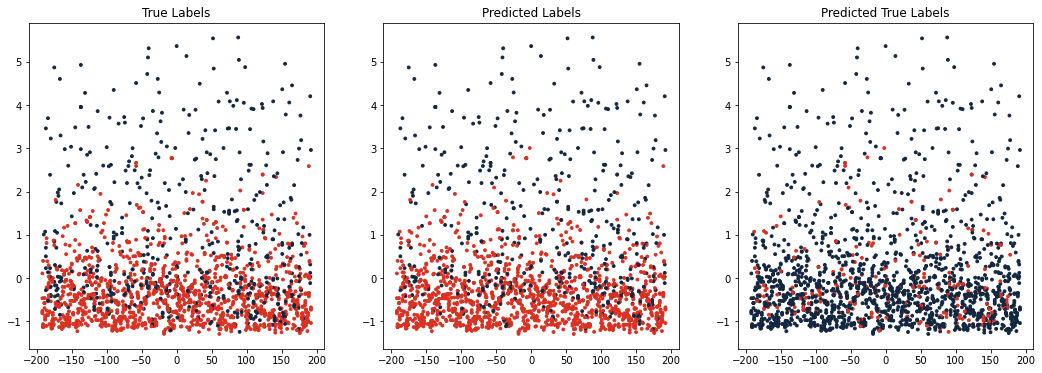

In [220]:
plt.figure(figsize=(18,6))

plt.subplot(1,3,1)
plt.scatter(X_embeding[0], X_embeding[1], 8, c=pd.Series(Y_test).map({1:'#142740', 0:'#D93223'}))
plt.title("True Labels")

plt.subplot(1,3,2)
plt.scatter(X_embeding[0], X_embeding[1], 8, c=pd.Series(Y_predict).map({1:'#142740', 0:'#D93223'}))
plt.title("Predicted Labels")

plt.subplot(1,3,3)
Y_new = (Y_predict == Y_test).astype(int)
plt.scatter(X_embeding[0], X_embeding[1], 8, c=pd.Series(Y_new).map({1:'#142740', 0:'#D93223'}))
plt.title("Predicted True Labels")
plt.show()

<hr>

In [221]:
X_embeding = (PCA(n_components=3).fit_transform(X_p2.drop(columns=[column for column in X_p2.columns if X_p2[column].dtype==object]))).T
Y_test = Y_p2
Y_predict = clf2.predict(X_p2)

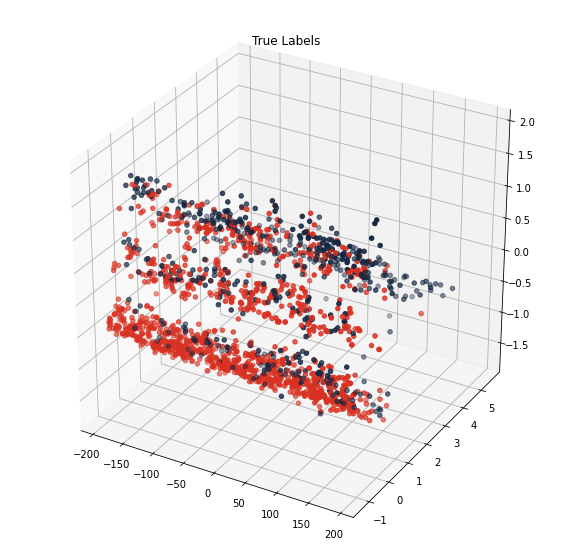

In [222]:
fig = plt.figure(figsize=(10,10))
ax = fig.gca(projection='3d')
ax.scatter(X_embeding[0], X_embeding[1], X_embeding[2], c=pd.Series(Y_test).map({1:'#142740', 0:'#D93223'}))
plt.title("True Labels")
plt.show()

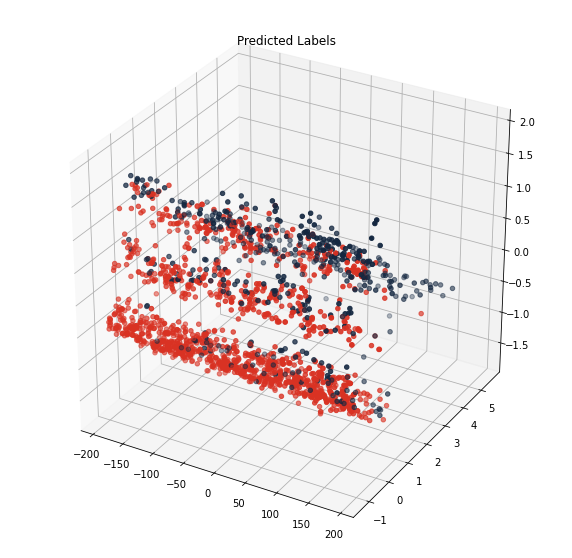

In [223]:
fig = plt.figure(figsize=(10,10))
ax = fig.gca(projection='3d')
ax.scatter(X_embeding[0], X_embeding[1], X_embeding[2], c=pd.Series(Y_predict).map({1:'#142740', 0:'#D93223'}))
plt.title("Predicted Labels")
plt.show()

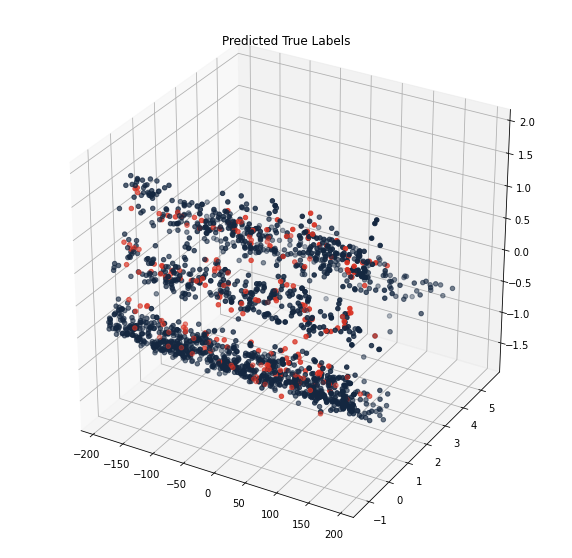

In [224]:
Y_new = (Y_predict == Y_test).astype(int)
fig = plt.figure(figsize=(10,10))
ax = fig.gca(projection='3d')
ax.scatter(X_embeding[0], X_embeding[1], X_embeding[2], c=pd.Series(Y_new).map({1:'#142740', 0:'#D93223'}))
plt.title("Predicted True Labels")
plt.show()

<div dir="rtl" align= "justify">
<font face="Vazir" size=3>
نمودارهای بالا صرفا برای مشاهده عملکرد مدل بر روی داده‌ها و عملکرد مدل در جداسازی داده‌ها، کاربرد دارند و شهود خوبی در این باره به ما می‌دهند. توجه کنید که رنگ آبی به منزله نیاز فرد بیمار به ICU و رنگ قرمز به منزله عدم نیاز فرد به ICU می‌باشد.
</font>
</div>

<hr>

<div dir="rtl" align= "justify">
<font face="Vazir" size=3>
مراحل کلی آموزش مدل Logistic Regression به عنوان مدل نهایی در قطعه کد زیر آمده است.
</font>
</div>

In [280]:
def final_model(df, main_column='ICU', metric='f1_macro'):
    numeric_transformer = Pipeline(steps=[
        ('imputer', SimpleImputer(strategy='median')),
        ('scaler', StandardScaler())])
    categorical_transformer = Pipeline(steps=[
        ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
        ('onehot', OneHotEncoder(handle_unknown='ignore'))])

    X = df.drop(columns=[main_column])
    Y = df[main_column]

    x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.15, random_state=22)
    x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.175, random_state=22)

    numeric_features = x_train.select_dtypes(include=['int64', 'float64']).columns
    categorical_features = x_train.select_dtypes(include=['object']).columns

    preprocessor = ColumnTransformer(
        transformers=[
            ('num', numeric_transformer, numeric_features),
            ('cat', categorical_transformer, categorical_features)
        ])

    model = Pipeline(steps=[('preprocessor', preprocessor),
                          ('classifier', LogisticRegression())])
    model.fit(x_train, y_train)

    y_t_train = model.predict(x_train)
    y_t_val = model.predict(x_val)
    y_t_test = model.predict(x_test)

    model_evaluation_train = evaluate(y_train, y_t_train)
    model_evaluation_val = evaluate(y_val, y_t_val)
    model_evaluation_test = evaluate(y_test, y_t_test)

    scores_lr = cross_val_score(model, X, Y, cv=5, scoring=metric)
    print("%0.2f %s with a standard deviation of %0.2f" % (scores_lr.mean(), metric, scores_lr.std()))
    return (model, model_evaluation_train, model_evaluation_val, model_evaluation_test)

<hr>

# Early Prediction

<div dir="rtl" align= "justify">
<font face="Vazir" size=3>
برای تست early prediction، ابتدا به ازای دیتافریم df_compact سطرهایی که WINDOW آن‌ها برابر مقدار 'ABOVE_12' می‌باشند را در نظر گرفته و مقدار ستون ICU را در یک ستون دیگر به اسم ICU_ep ذخیره می‌کنیم و سپس این سطرها را از دیتافریم حذف می‌نماییم.
</font>
</div>

In [267]:
df_copy = df_compact.copy()
df_copy = pd.merge(df_copy, df_copy[df_copy['WINDOW'] == 'ABOVE_12'].rename(columns={'ICU':'ICU_p'})[['PATIENT_VISIT_IDENTIFIER', 'ICU_p']], on='PATIENT_VISIT_IDENTIFIER')
df_copy.drop(columns=['ICU'], inplace=True)
df_copy = df_copy.drop(index=df_copy[df_copy['WINDOW'] == 'ABOVE_12'].index)

In [281]:
result = final_model(df_copy, main_column='ICU_p', metric='accuracy')

0.80 accuracy with a standard deviation of 0.01


In [283]:
pd.DataFrame(data={
    'train':list(result[1].values()),
    'val':list(result[2].values()),
    'test':list(result[3].values())
}, index=result[1].keys())

,train,val,test
accuracy,0.876738,0.860870,0.852814
f1,0.872483,0.878788,0.839623
precision,0.893910,0.920635,0.855769
recall,0.852060,0.840580,0.824074
f1_negative,0.880717,0.836735,0.864000
precision_negative,0.861404,0.788462,0.850394
recall_negative,0.900917,0.891304,0.878049
roc_auc,0.876489,0.865942,0.851061
average_precision_score,0.834881,0.869519,0.787468
